<div style="text-align:right">Update date: Dec 23, 2023</div><br>

# **Ecommerce Optimization**<br>

This study case simulates that we are an e-commerce company in the cosmetics sector.
This company has had a flat evolution in recent months and has commissioned us to analyze its transactional data and implement CRO(Conversion Rate Optimization) actions personalized to its situation based on said analysis.
<br><br>

## Business Analytics<br>
### Objetive<br>
Analyze transactional data to try potential CRO(Conversion Rate Optimization) actions that increase visits, conversions and average ticket, and therefore, increase the overall e-commerce turnover.

Create advanced analytical assets such as RFM(Recency Frequency Monetary) segmentation and a recommendation system that drives goal achievement.
<br><br>

### Levers<br> 
**How does an e-commerce business work?**<br><br>


Funnel or Customer Journey process:
* The first step is when the user reaches the ecommerce website. Typically it will come from:<br><br>
   a) Paid campaigns: paid ads such as Facebook Ads or Google Ads<br>
   b) Organic content: blog, rss, etc.<br>
   c) Direct traffic: knows the url and enters it in the browser<br><br>

* This traffic is called **visits**, and the pages they view are called page **views**.
* The user browsers the web and when he likes a product he puts it in the **cart**.
* Finally you can **remove products** from the cart, leave without purchasing anything, or finally **place the order**.
* A common process is **cross-selling**, in which other products that might also interest the user are recommended.
* Even when they are gone we can contact the user again through retargeting or email marketing.
<br><br>

Data logging in the online environment:
* User registration can be authenticated or not
* The sequence of actions a user takes over the duration of a browsing connection is called a **session**.
* The ratio of purchases to visits is called **conversion ratio**<br><br>

Other key metrics:<br>
* CAC: Customer Acquisition Cost
* AOV: Average Order Value
* Purchase Frequency(How many more times does a customer buy from me after the first one?)
* LTV: Life Time Value(Total revenue that a customer is expected to generate over their lifetime as a customer)
* Churn rate: Percentage of a business's total customers that stop doing business during a given period.
<br><br>

_To increase the business, the following **operational levers** were identified:_
* **Customer journey**: Optimize each step of the process.
* **Clients**: Use available customer information to optimize marketing campaigns.
* **Products**: Optimize the product catalog and identify in a personalized way which products we have to put in front of each customer.

<br>

### Key Performance Indicator(KPI)<br>
* Visits
* Conversion
* Purchase frequency
* Average ticket
* Churn rate
<br>

### Entities and Data<br>
The entities and data availability for our objetive are:
* Users
* Clients
* Sessions
* Events
* Products
<br>

### Seed Questions<br>
**About customer journey:**<br><br>
* What is a typical purchasing process like?
* How many products are viewed, added to cart, abandoned and purchased on average in each session?
* What has been the trend of these indicators in recent months?
<br><br>

**About clients:**<br><br>
* How many products does each customer buy?
* How much does each client spend?
* Are there "better customers" that need to be identified and treated differently?
* Do customers repeat purchases in the following months?
* What is the average LTV(Life Time Value) of a customer?
* Can we design personalized campaigns to the client's value?
<br><br>

**About products:**<br><br>
* What are the best-selling products?
* Are there products that are not sold?
* Is there a relationship between the price of the product and its sales volume?
* Are there products that are visited but not purchased?
* Are there products that are frequently removed from the cart?
* Could personalized product recommendations be made for each client?
<br><br>

### The general outline of this notebook is as follows:
1. Load data
2. Analysis and insights
3. Communication of results
<br><br>

### Main work tools<br>

|Package|                           Version|
|:---------------------------------|--------:|
|matplotlib                        |3.8.0 |
|numpy                             |1.25.2 |
|notebook                          |6.5.4 |
|pandas                            |2.1.1 |
|python                            |3.10.12 |
|plotly                            |5.18.0 |
|scipy                             |1.11.3 |
|seaborn                           |0.13.0 |



Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

%matplotlib inline
%config IPCompleter.greedy = True

#Format pandas
pd.options.display.max_columns = None
pd.options.display.float_format = '{:15.2f}'.format

sns.set_theme(style="whitegrid")

## Load data

These data were explored, cleaned and transformed to select the data necessary to integrate the datamart, which was stored in a pickle file. Specific details can be consulted in the corresponding [Exploratory Data Analysis](https://github.com/ACCpath/ExploratoryDataAnalysis/blob/main/EcommerceOptimization/ecommerce_optimization_EDA.ipynb) directory.

Connect to data source

In [2]:
df = pd.read_pickle('./data/datamart.pickle')
df.head()

user_id                          user_session  \
event_time                                                             
2019-10-01 00:01:46  462033176  a18e0999-61a1-4218-8f8f-61ec1d375361   
2019-10-01 00:01:55  514753614  e2fecb2d-22d0-df2c-c661-15da44b3ccf1   
2019-10-01 00:02:50  527418424  86e77869-afbc-4dff-9aa2-6b7dd8c90770   
2019-10-01 00:03:41  555448072  b5f72ceb-0730-44de-a932-d16db62390df   
2019-10-01 00:03:44  552006247  2d8f304b-de45-4e59-8f40-50c603843fe5   

                             category_id event_type  product_id  \
event_time                                                        
2019-10-01 00:01:46  1487580005092295511       view     5843665   
2019-10-01 00:01:55  1487580013069861041       cart     5868461   
2019-10-01 00:02:50  1487580006300255120       view     5877456   
2019-10-01 00:03:41  1487580013749338323       view     5649270   
2019-10-01 00:03:44  1487580005411062629       view       18082   

                              price        date  year  month  day  hour  \
event_time                                                                
2019-10-01 00:01:46            9.44  2019-10-01  2019     10    1     0   
2019-10-01 00:01:55            3.57  2019-10-01  2019     10    1     0   
2019-10-01 00:02:50          122.22  2019-10-01  2019     10    1     0   
2019-10-01 00:03:41            6.19  2019-10-01  2019     10    1     0   
2019-10-01 00:03:44           16.03  2019-10-01  2019     10    1     0   

                     minute  second  festive  black_friday  valentin_day  
event_time                                                                
2019-10-01 00:01:46       1      46        0             0             0  
2019-10-01 00:01:55       1      55        0             0             0  
2019-10-01 00:02:50       2      50        0             0             0  
2019-10-01 00:03:41       3      41        0             0             0  
2019-10-01 00:03:44       3      44        0             0             0

## Analysis and insights

### Customer Journey Analysis

#### How is the Customer Journey working?

In [3]:
events = df.event_type.value_counts()
events

event_type
view                961431
cart                564868
remove_from_cart    303983
purchase            127475
Name: count, dtype: int64

In [4]:
kpi_views_p = 100
kpi_cart_p = events.loc['cart'] / events.loc['view'] * 100
kpi_abandonment_p = events.loc['remove_from_cart'] / events.loc['cart'] * 100
kpi_purchase_p = events.loc['purchase'] / events.loc['cart'] * 100

kpis = pd.DataFrame({'kpi':['views', 'cart', 'purchase'],
                     'value':[kpi_views_p,kpi_cart_p, kpi_purchase_p]})
kpis

kpi           value
0     views          100.00
1      cart           58.75
2  purchase           22.57

In [6]:
def draw_funnel_graph(x, y, colors, title):
    fig = go.Figure(
        go.Funnel(y=y, x=x, marker={'color':colors}, opacity=0.3)
    )
    fig.update_layout(title=title)
    fig.show()

In [7]:
draw_funnel_graph(x=kpis.value.round(2), y=kpis.kpi, colors=['red', 'blue', 'green'],
                  title='Initial Funnel Conversion')

Conclusions:

* Starting rates are 60% cart over views and 22% purchase over cart.
* Therefore, there are 40% of visits that need to be worked on to get more carts, and 78% of carts that need to be worked on to get more purchases.

#### How many products are viewed, added to cart, abandoned and purchased on average in each session?

Generate dataframe grouped by session and event type

In [8]:
session_product = df.groupby(['user_session', 'event_type']).product_id.count()\
    .unstack().fillna(0)
session_product

event_type                                      cart        purchase  \
user_session                                                           
0000597b-de39-4a77-9fe5-02c8792ca14e            0.00            0.00   
0000645a-8160-4a3d-91bf-154bff0a22e3            0.00            0.00   
000090e1-da13-42b1-a31b-91a9ee5e6a88            0.00            0.00   
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b            0.00            0.00   
0000de26-bd58-42c9-9173-4763c76b398e            0.00            0.00   
...                                              ...             ...   
ffff6695-b64d-4a67-aa14-34b3b7f63c3f            0.00            0.00   
ffff7d69-b706-4c64-9d6d-da57a04bc32b            0.00            0.00   
ffff8044-2a22-4846-8a72-999e870abbe9            0.00            0.00   
ffff91d4-7879-4a4b-8b26-c67915a27dc8            0.00            0.00   
ffffbe0a-d2c2-47c7-afab-680bfdfda50d            0.00            0.00   

event_type                            remove_from_cart            view  
user_session                                                            
0000597b-de39-4a77-9fe5-02c8792ca14e              0.00            3.00  
0000645a-8160-4a3d-91bf-154bff0a22e3              0.00            2.00  
000090e1-da13-42b1-a31b-91a9ee5e6a88              0.00            1.00  
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b              0.00            1.00  
0000de26-bd58-42c9-9173-4763c76b398e              0.00            1.00  
...                                                ...             ...  
ffff6695-b64d-4a67-aa14-34b3b7f63c3f              0.00            2.00  
ffff7d69-b706-4c64-9d6d-da57a04bc32b              0.00            1.00  
ffff8044-2a22-4846-8a72-999e870abbe9              0.00            1.00  
ffff91d4-7879-4a4b-8b26-c67915a27dc8              0.00            1.00  
ffffbe0a-d2c2-47c7-afab-680bfdfda50d              0.00            1.00  

[446054 rows x 4 columns]

Check totals

In [9]:
session_product.sum()

event_type
cart                     564868.00
purchase                 127475.00
remove_from_cart         303983.00
view                     961431.00
dtype: float64

Sort columns

In [10]:
session_product = session_product[['view', 'cart', 'remove_from_cart', 'purchase']]
session_product

event_type                                      view            cart  \
user_session                                                           
0000597b-de39-4a77-9fe5-02c8792ca14e            3.00            0.00   
0000645a-8160-4a3d-91bf-154bff0a22e3            2.00            0.00   
000090e1-da13-42b1-a31b-91a9ee5e6a88            1.00            0.00   
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b            1.00            0.00   
0000de26-bd58-42c9-9173-4763c76b398e            1.00            0.00   
...                                              ...             ...   
ffff6695-b64d-4a67-aa14-34b3b7f63c3f            2.00            0.00   
ffff7d69-b706-4c64-9d6d-da57a04bc32b            1.00            0.00   
ffff8044-2a22-4846-8a72-999e870abbe9            1.00            0.00   
ffff91d4-7879-4a4b-8b26-c67915a27dc8            1.00            0.00   
ffffbe0a-d2c2-47c7-afab-680bfdfda50d            1.00            0.00   

event_type                            remove_from_cart        purchase  
user_session                                                            
0000597b-de39-4a77-9fe5-02c8792ca14e              0.00            0.00  
0000645a-8160-4a3d-91bf-154bff0a22e3              0.00            0.00  
000090e1-da13-42b1-a31b-91a9ee5e6a88              0.00            0.00  
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b              0.00            0.00  
0000de26-bd58-42c9-9173-4763c76b398e              0.00            0.00  
...                                                ...             ...  
ffff6695-b64d-4a67-aa14-34b3b7f63c3f              0.00            0.00  
ffff7d69-b706-4c64-9d6d-da57a04bc32b              0.00            0.00  
ffff8044-2a22-4846-8a72-999e870abbe9              0.00            0.00  
ffff91d4-7879-4a4b-8b26-c67915a27dc8              0.00            0.00  
ffffbe0a-d2c2-47c7-afab-680bfdfda50d              0.00            0.00  

[446054 rows x 4 columns]

Calculate the average of each event per session.

In [11]:
mean_events_session = session_product.mean()
mean_events_session

event_type
view                          2.16
cart                          1.27
remove_from_cart              0.68
purchase                      0.29
dtype: float64

Conclusion:

In each session, on average:

* 2.1 products are seen
* 1.3 added to cart
* 0.7 products are removed from the cart
* 0.3 products are purchased

These are the numbers that we will have to increase with CRO(Conversion Rate Optimization) actions.

#### Are there differences between hourly events?

Distribution of events per hour

In [12]:
events_hour = df.groupby(['event_type', 'hour']).product_id.count().unstack(level=0)
events_hour

event_type   cart  purchase  remove_from_cart   view
hour                                                
0            6335       962              2372   8730
1            5383      1127              2779   7278
2            6277      1220              2573   8377
3            8409      1534              3806  11806
4           10981      2388              6023  18360
5           16594      3490              8666  27431
6           21679      5123             12190  38052
7           26582      5946             13706  46066
8           28909      7151             15515  49569
9           31528      7584             16501  54179
10          32351      7808             18042  56454
11          32771      8490             19120  57589
12          33706      8247             18067  57521
13          31446      8126             17148  55527
14          30008      7119             16481  52178
15          28319      6478             15234  49802
16          28414      6527             15110  51046
17          32015      6239             17987  55662
18          35827      8203             21341  59526
19          39009      7433             19649  63725
20          34258      7251             18128  57303
21          22852      4602             12762  38902
22          13299      2881              6481  23042
23           7916      1546              4302  13306

Graph the distribution of events by hour

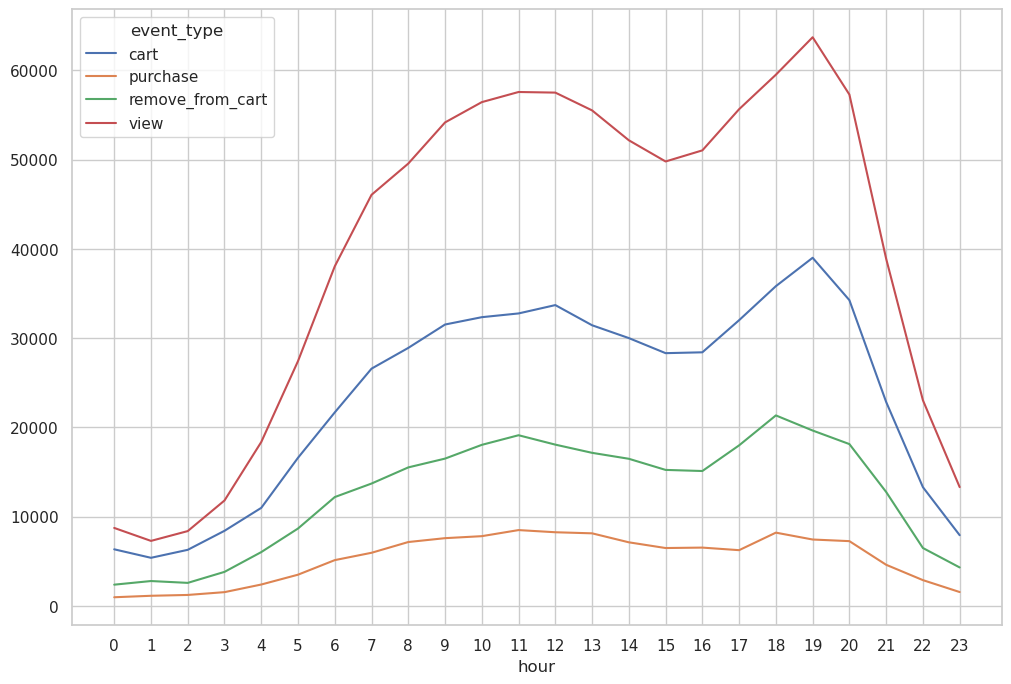

In [13]:
events_hour.plot(figsize=(12,8))
plt.xticks(ticks=events_hour.index)
plt.show()

Generate variable corresponding to the ratio of purchases per visit in each hour.

In [14]:
events_hour['purchase_visit'] = events_hour['purchase'] / events_hour['view'] * 100
events_hour

event_type   cart  purchase  remove_from_cart   view  purchase_visit
hour                                                                
0            6335       962              2372   8730           11.02
1            5383      1127              2779   7278           15.49
2            6277      1220              2573   8377           14.56
3            8409      1534              3806  11806           12.99
4           10981      2388              6023  18360           13.01
5           16594      3490              8666  27431           12.72
6           21679      5123             12190  38052           13.46
7           26582      5946             13706  46066           12.91
8           28909      7151             15515  49569           14.43
9           31528      7584             16501  54179           14.00
10          32351      7808             18042  56454           13.83
11          32771      8490             19120  57589           14.74
12          33706      8247             18067  57521           14.34
13          31446      8126             17148  55527           14.63
14          30008      7119             16481  52178           13.64
15          28319      6478             15234  49802           13.01
16          28414      6527             15110  51046           12.79
17          32015      6239             17987  55662           11.21
18          35827      8203             21341  59526           13.78
19          39009      7433             19649  63725           11.66
20          34258      7251             18128  57303           12.65
21          22852      4602             12762  38902           11.83
22          13299      2881              6481  23042           12.50
23           7916      1546              4302  13306           11.62

Sort columns

In [15]:
events_hour = events_hour[['view', 'cart', 'remove_from_cart', 'purchase', 'purchase_visit']]
events_hour

event_type   view   cart  remove_from_cart  purchase  purchase_visit
hour                                                                
0            8730   6335              2372       962           11.02
1            7278   5383              2779      1127           15.49
2            8377   6277              2573      1220           14.56
3           11806   8409              3806      1534           12.99
4           18360  10981              6023      2388           13.01
5           27431  16594              8666      3490           12.72
6           38052  21679             12190      5123           13.46
7           46066  26582             13706      5946           12.91
8           49569  28909             15515      7151           14.43
9           54179  31528             16501      7584           14.00
10          56454  32351             18042      7808           13.83
11          57589  32771             19120      8490           14.74
12          57521  33706             18067      8247           14.34
13          55527  31446             17148      8126           14.63
14          52178  30008             16481      7119           13.64
15          49802  28319             15234      6478           13.01
16          51046  28414             15110      6527           12.79
17          55662  32015             17987      6239           11.21
18          59526  35827             21341      8203           13.78
19          63725  39009             19649      7433           11.66
20          57303  34258             18128      7251           12.65
21          38902  22852             12762      4602           11.83
22          23042  13299              6481      2881           12.50
23          13306   7916              4302      1546           11.62

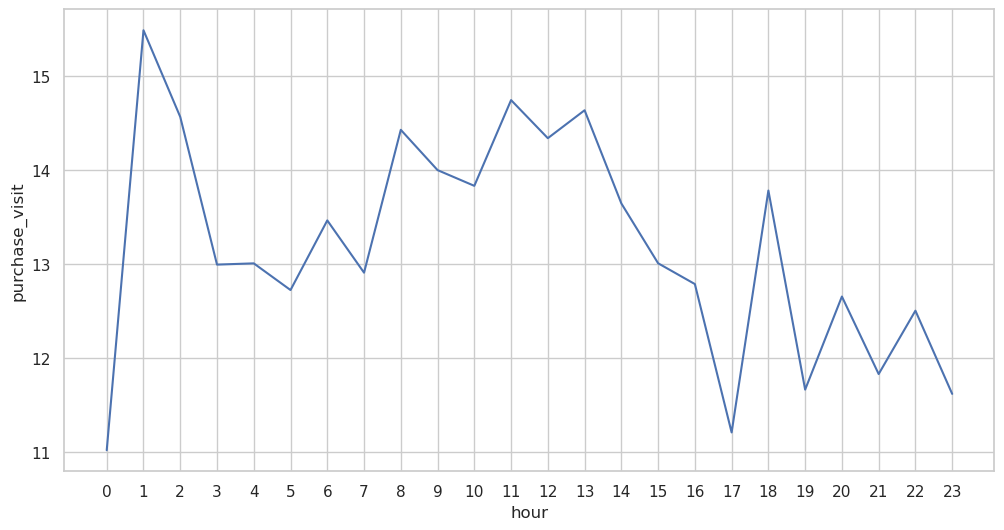

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data=events_hour, x=events_hour.index, y='purchase_visit')
plt.xticks(ticks=events_hour.index)
plt.show()

Conclusions:
    
* The hours when people buy the most are 1, 8, 11 a.m. to 1 p.m., and 6 p.m.
* The hours when people do not shop are midnight, 3 a.m. to 7 a.m., 2 p.m. to 5 p.m., and 7 p.m. to 11 p.m.

Analyze at all whether or not there are more frequent times for each type of event.

In [17]:
def tipify_variable(var):
    """Transform the values of a variable to Z score
    """
    mean = var.mean()
    std = var.std()
    return(var.apply(lambda x: (x - mean) / std))

In [18]:
events_hour_tipify = events_hour.apply(tipify_variable)
events_hour_tipify

event_type            view            cart  remove_from_cart        purchase  \
hour                                                                           
0                    -1.60           -1.56             -1.64           -1.62   
1                    -1.68           -1.64             -1.58           -1.56   
2                    -1.62           -1.56             -1.61           -1.53   
3                    -1.45           -1.37             -1.41           -1.41   
4                    -1.11           -1.14             -1.06           -1.09   
5                    -0.65           -0.63             -0.64           -0.68   
6                    -0.10           -0.17             -0.08           -0.07   
7                     0.31            0.28              0.17            0.24   
8                     0.49            0.49              0.45            0.69   
9                     0.72            0.72              0.61            0.85   
10                    0.84            0.80              0.86            0.93   
11                    0.90            0.84              1.03            1.19   
12                    0.89            0.92              0.86            1.09   
13                    0.79            0.72              0.71            1.05   
14                    0.62            0.59              0.61            0.67   
15                    0.50            0.43              0.41            0.44   
16                    0.56            0.44              0.39            0.45   
17                    0.80            0.77              0.85            0.35   
18                    1.00            1.11              1.38            1.08   
19                    1.21            1.40              1.11            0.79   
20                    0.88            0.97              0.87            0.72   
21                   -0.06           -0.06              0.02           -0.26   
22                   -0.87           -0.93             -0.99           -0.91   
23                   -1.37           -1.41             -1.33           -1.40   

event_type  purchase_visit  
hour                        
0                    -1.83  
1                     1.91  
2                     1.14  
3                    -0.17  
4                    -0.16  
5                    -0.40  
6                     0.22  
7                    -0.25  
8                     1.03  
9                     0.67  
10                    0.53  
11                    1.29  
12                    0.95  
13                    1.20  
14                    0.37  
15                   -0.16  
16                   -0.35  
17                   -1.67  
18                    0.49  
19                   -1.29  
20                   -0.46  
21                   -1.15  
22                   -0.58  
23                   -1.33

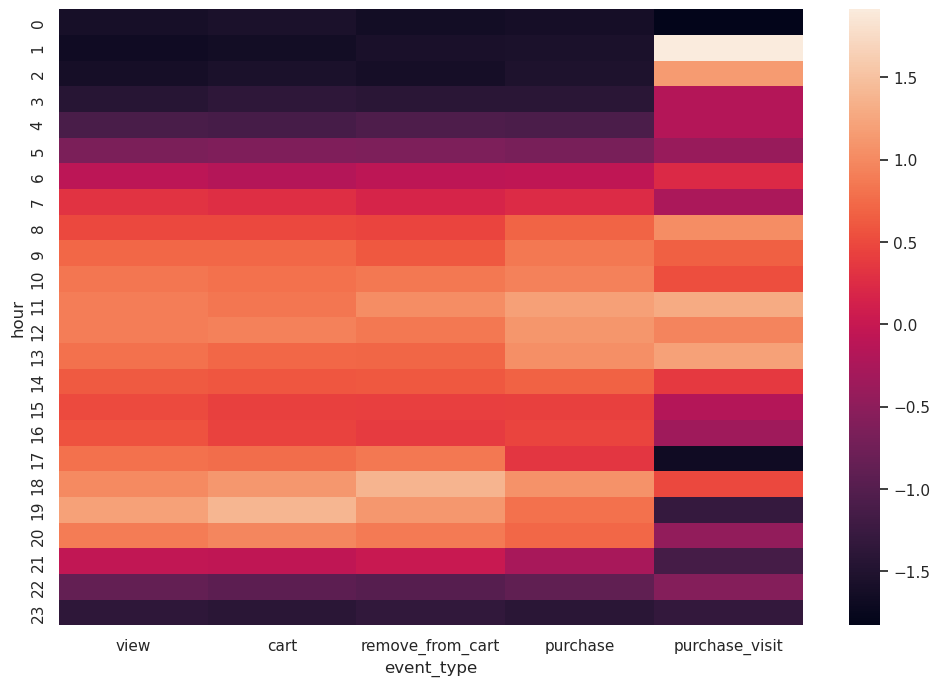

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(data=events_hour_tipify)
plt.show()

Generate line chart

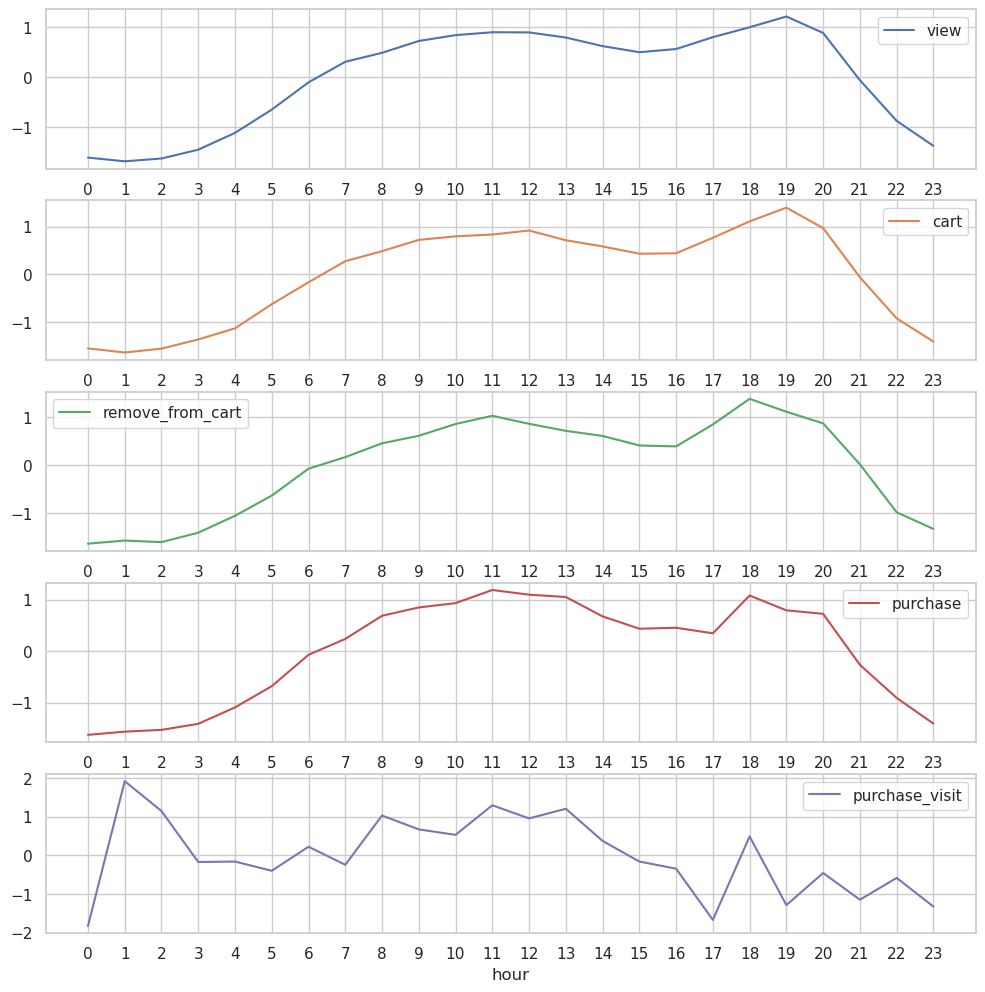

In [20]:
events_hour_tipify.plot(subplots=True, sharex=False, figsize=(12,12),
                        xticks=events_hour_tipify.index)
plt.show()

Conclusions:

* **INSIGHT #1**: All metrics are maximized in the ranges between 9 a.m. and 1 p.m. and between 6 p.m. and 8 p.m.
* This information is very relevant, for example, for paid ads, both for traffic generation and retargeting.
* Furthermore, there seems to be some subtype of user who buys at 1 in the morning, who, although not very frequent, do buy a lot.

#### What is the average monthly billing?

In [21]:
df[df.event_type == 'purchase'].groupby('month').price.sum().mean()

124239.33200000001

#### What is the trend in recent months?

In [22]:
trend = df.groupby('event_type').resample('W', kind='period').event_type.count()\
    .unstack(level=0)
trend

event_type              cart  purchase  remove_from_cart   view
event_time                                                     
2019-09-30/2019-10-06  30247      4436             11048  36352
2019-10-07/2019-10-13  27333      5414             13640  44400
2019-10-14/2019-10-20  23541      5026             11665  39484
2019-10-21/2019-10-27  25422      5655             13888  40382
2019-10-28/2019-11-03  23765      5738             12428  39362
2019-11-04/2019-11-10  28766      6660             17184  46174
2019-11-11/2019-11-17  24994      5138             12971  41166
2019-11-18/2019-11-24  37444      9752             20827  56475
2019-11-25/2019-12-01  31447      7488             17367  48882
2019-12-02/2019-12-08  22992      5101             14332  42054
2019-12-09/2019-12-15  24236      5953             13788  45873
2019-12-16/2019-12-22  19596      4700             11080  39233
2019-12-23/2019-12-29  16870      3703              8379  32802
2019-12-30/2020-01-05  16466      3294              9649  31909
2020-01-06/2020-01-12  25896      5583             13334  46869
2020-01-13/2020-01-19  28024      6901             16524  50209
2020-01-20/2020-01-26  25978      6352             13857  48476
2020-01-27/2020-02-02  28782      7119             15597  52412
2020-02-03/2020-02-09  28308      5852             14996  48405
2020-02-10/2020-02-16  27435      6329             15820  47190
2020-02-17/2020-02-23  25097      5998             13531  43611
2020-02-24/2020-03-01  22229      5283             12078  39711

In [23]:
trend = trend[['view','cart','remove_from_cart','purchase']]
trend

event_type              view   cart  remove_from_cart  purchase
event_time                                                     
2019-09-30/2019-10-06  36352  30247             11048      4436
2019-10-07/2019-10-13  44400  27333             13640      5414
2019-10-14/2019-10-20  39484  23541             11665      5026
2019-10-21/2019-10-27  40382  25422             13888      5655
2019-10-28/2019-11-03  39362  23765             12428      5738
2019-11-04/2019-11-10  46174  28766             17184      6660
2019-11-11/2019-11-17  41166  24994             12971      5138
2019-11-18/2019-11-24  56475  37444             20827      9752
2019-11-25/2019-12-01  48882  31447             17367      7488
2019-12-02/2019-12-08  42054  22992             14332      5101
2019-12-09/2019-12-15  45873  24236             13788      5953
2019-12-16/2019-12-22  39233  19596             11080      4700
2019-12-23/2019-12-29  32802  16870              8379      3703
2019-12-30/2020-01-05  31909  16466              9649      3294
2020-01-06/2020-01-12  46869  25896             13334      5583
2020-01-13/2020-01-19  50209  28024             16524      6901
2020-01-20/2020-01-26  48476  25978             13857      6352
2020-01-27/2020-02-02  52412  28782             15597      7119
2020-02-03/2020-02-09  48405  28308             14996      5852
2020-02-10/2020-02-16  47190  27435             15820      6329
2020-02-17/2020-02-23  43611  25097             13531      5998
2020-02-24/2020-03-01  39711  22229             12078      5283

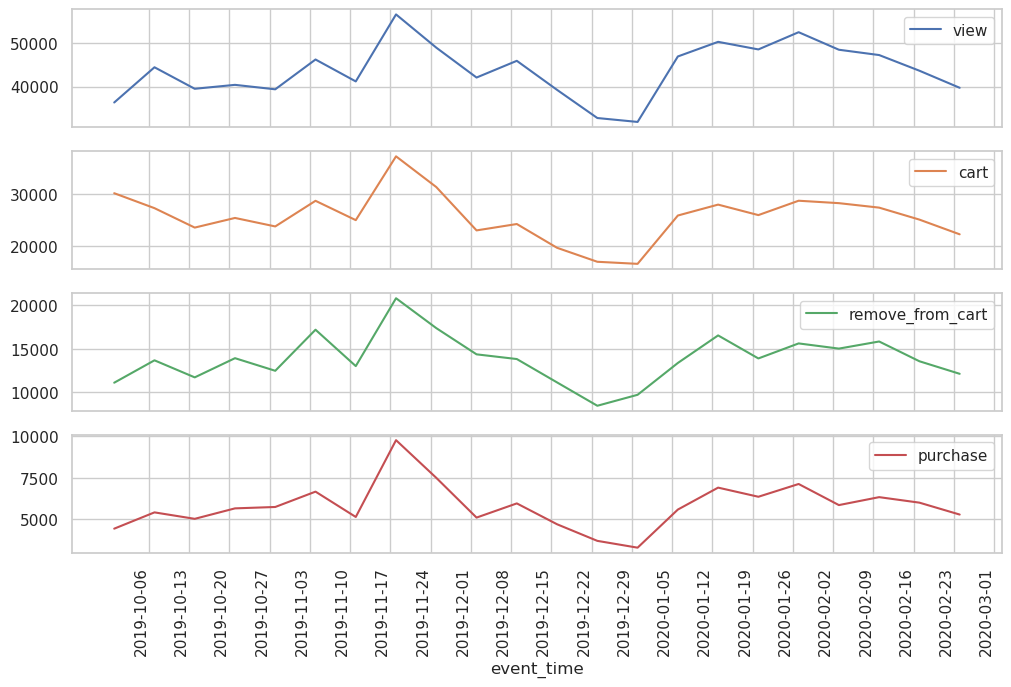

In [24]:
trend.plot(subplots=True, figsize=(12,8), sharex=True, xticks=trend.index,
           x_compat=True, rot=90)
plt.show()

The trend is flat across all metrics, confirming the need for CRO(Conversion Rate Optimization) actions.

There is a significant peak in the week of November 18 to 24 due to Black Friday.

Generate a daily analysis for November and December to see the effect up close

In [25]:
trend_daily = df.loc['2019-11':'2019-12'].groupby('event_type')\
    .resample('D', kind='period').event_type.count().unstack(level=0)
trend_daily = trend_daily[['view', 'cart', 'remove_from_cart', 'purchase']]
trend_daily

event_type  view  cart  remove_from_cart  purchase
event_time                                        
2019-11-01  5352  3523              1953       709
2019-11-02  4857  2973              1617       912
2019-11-03  5582  3518              1946       753
2019-11-04  6248  4574              3338       676
2019-11-05  7213  4066              2025       753
...          ...   ...               ...       ...
2019-12-27  4057  2004              1005       507
2019-12-28  3704  1722               890       329
2019-12-29  3939  2111               806       263
2019-12-30  3434  1348               588       258
2019-12-31  1724   556               357       114

[61 rows x 4 columns]

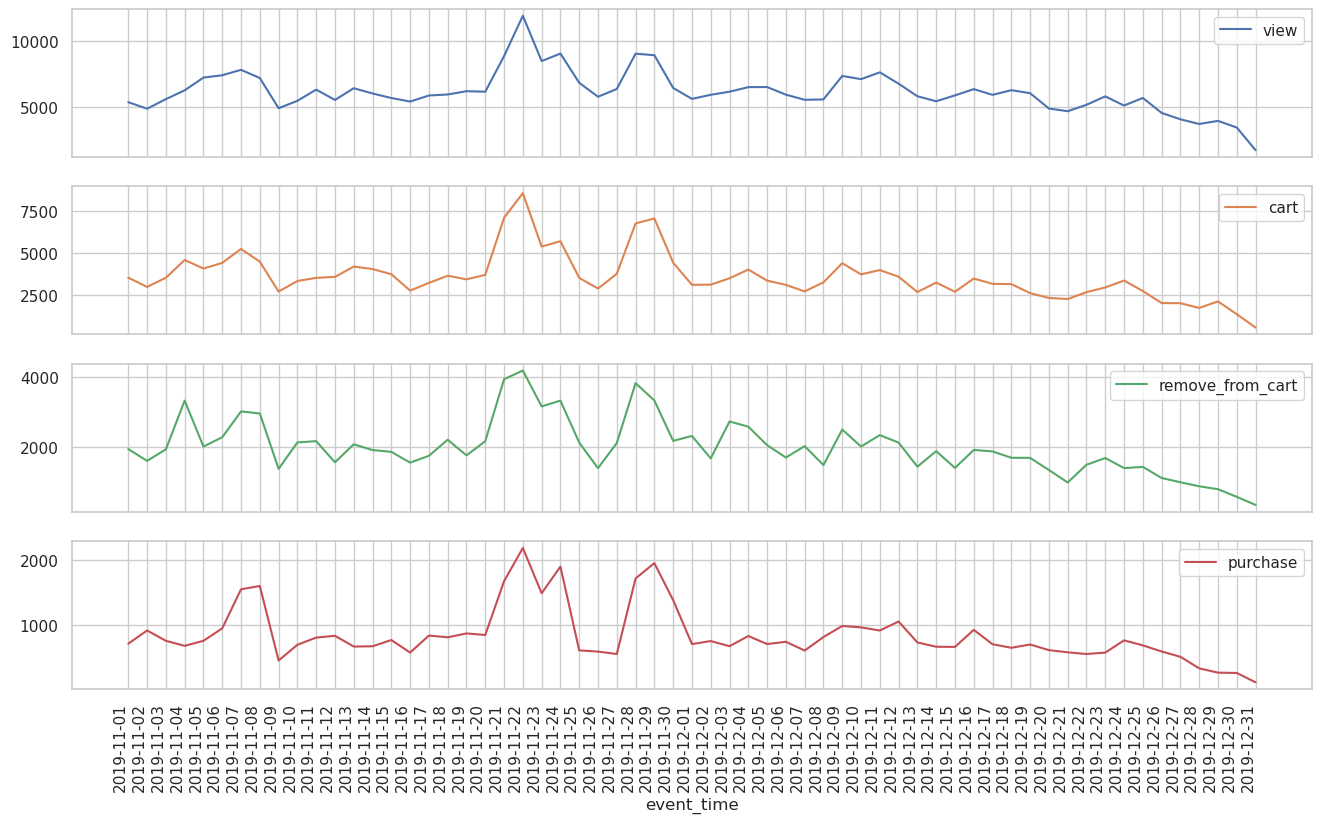

In [26]:
trend_daily.plot(subplots=True, figsize=(16,10), sharex=True, xticks=trend_daily.index,
                x_compat=True, rot=90)
plt.show()

Conclusions:

* Indeed the peak coincides with Black Friday (the 29th)
* There is a major peak a few days before, on the 22nd, possibly due to the beginning of the black Friday week.
* Surprisingly, the Christmas days themselves have a decreasing trend, which means that consumers have clearly brought forward their purchases.


Generate a daily analysis for January and Febraury to see the effect up close

In [27]:
trend_daily = df.loc['2020-01':'2020-02'].groupby('event_type').resample(
    'D', kind='period').event_type.count().unstack(level=0)
trend_daily = trend_daily[['view', 'cart', 'remove_from_cart', 'purchase']]

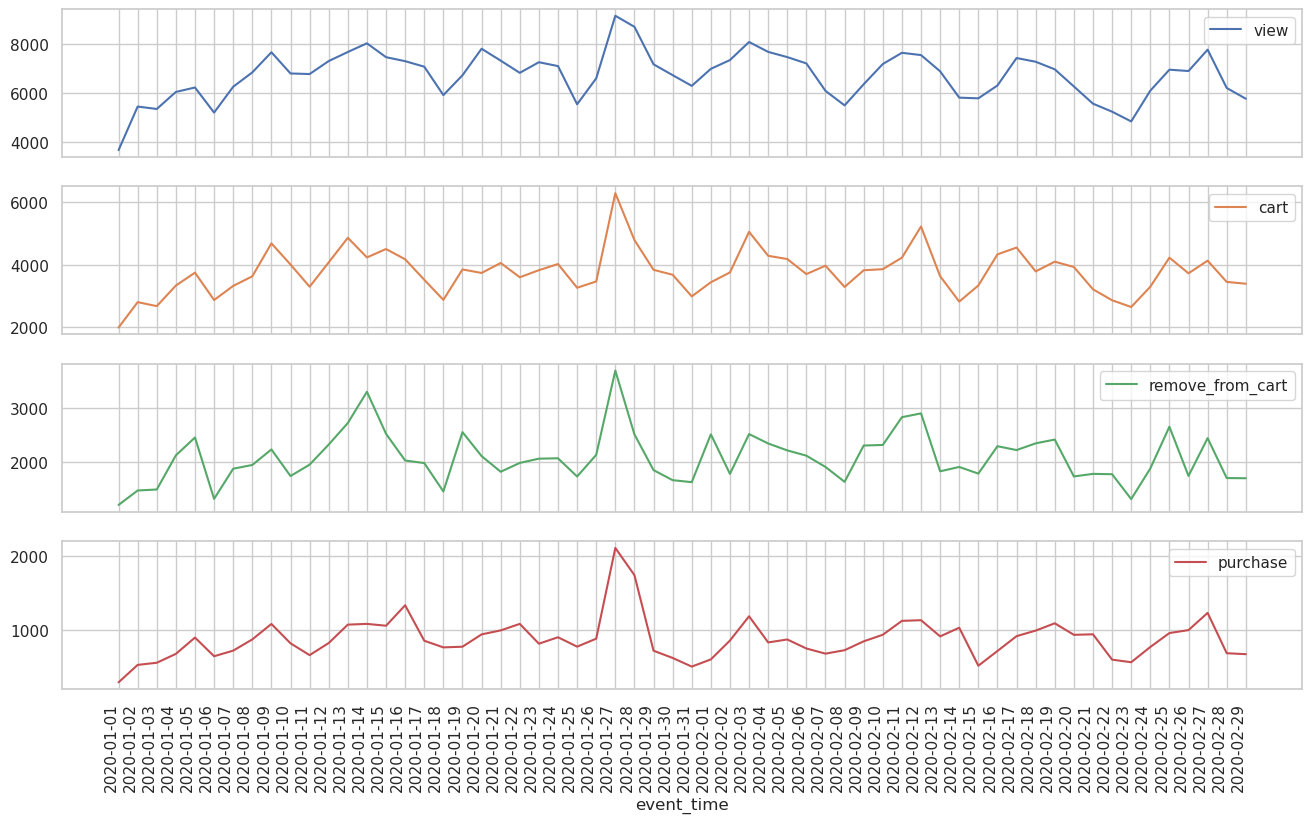

In [28]:
trend_daily.plot(subplots=True, figsize=(16,10), sharex=True, xticks=trend_daily.index,
                x_compat=True, rot=90)
plt.show()

Conclusions:

* During the week of Three Kings there is no peak in sales either.
* Not even the days before Valentine's Day
* But there is a very pronounced peak on January 27, probably some local event

**INSIGHT #2** The majority of Christmas shopping is distributed during the week of Black Friday.

#### Could we identify moments at the day-hour level in which the greatest number of purchases occur?


It would be very useful to concentrate a large part of the campaign investment right at those moments.

In [29]:
purchase_day_hour = df.loc[df.event_type == 'purchase'].groupby(['date', 'hour'])\
   .event_type.count().unstack(level=0).fillna(0)
purchase_day_hour

date      2019-10-01      2019-10-02      2019-10-03      2019-10-04  \
hour                                                                   
0              13.00           18.00            1.00            2.00   
1               0.00            0.00            5.00            0.00   
2               0.00            0.00            0.00           24.00   
3               0.00           24.00           10.00            0.00   
4              15.00            0.00           45.00           27.00   
5              49.00            9.00            6.00           17.00   
6              23.00           34.00           18.00           10.00   
7              26.00           60.00           26.00           54.00   
8              28.00           71.00          128.00           49.00   
9              24.00           34.00           90.00           61.00   
10             15.00           62.00           43.00           22.00   
11             95.00           80.00           83.00           36.00   
12              9.00           43.00          100.00           67.00   
13             16.00           76.00           69.00           18.00   
14             74.00           31.00           38.00           35.00   
15             25.00           10.00           45.00           28.00   
16             99.00           21.00           33.00           42.00   
17             88.00           80.00           55.00           31.00   
18             53.00           24.00           35.00           54.00   
19             29.00           25.00           19.00           14.00   
20             53.00           22.00           63.00           17.00   
21              1.00           55.00           25.00           42.00   
22             33.00           10.00            0.00           42.00   
23              0.00            0.00            7.00            0.00   

date      2019-10-05      2019-10-06      2019-10-07      2019-10-08  \
hour                                                                   
0               0.00            0.00            0.00            0.00   
1               4.00           24.00            3.00            0.00   
2               0.00            0.00            0.00           18.00   
3               0.00           26.00            2.00           20.00   
4               3.00           24.00           12.00           46.00   
5               1.00           14.00           21.00           10.00   
6              10.00           13.00           38.00           35.00   
7              58.00           20.00           63.00           26.00   
8              20.00           37.00           27.00           41.00   
9              44.00            8.00           56.00           43.00   
10             58.00           37.00           52.00           14.00   
11             33.00           44.00           53.00           66.00   
12             75.00           37.00           58.00           48.00   
13             30.00           40.00           44.00          108.00   
14             39.00           12.00           44.00           22.00   
15            127.00          116.00            9.00           31.00   
16             49.00           24.00           24.00           40.00   
17              8.00            1.00           53.00           34.00   
18              8.00           13.00           64.00          109.00   
19             31.00           47.00           97.00           70.00   
20              8.00           15.00          142.00           34.00   
21             12.00            9.00           38.00            8.00   
22             38.00            0.00           20.00           19.00   
23              0.00           26.00            0.00            0.00   

date      2019-10-09      2019-10-10      2019-10-11      2019-10-12  \
hour                                                                   
0               3.00           23.00           14.00            5.00   
1              16.00            0.00  

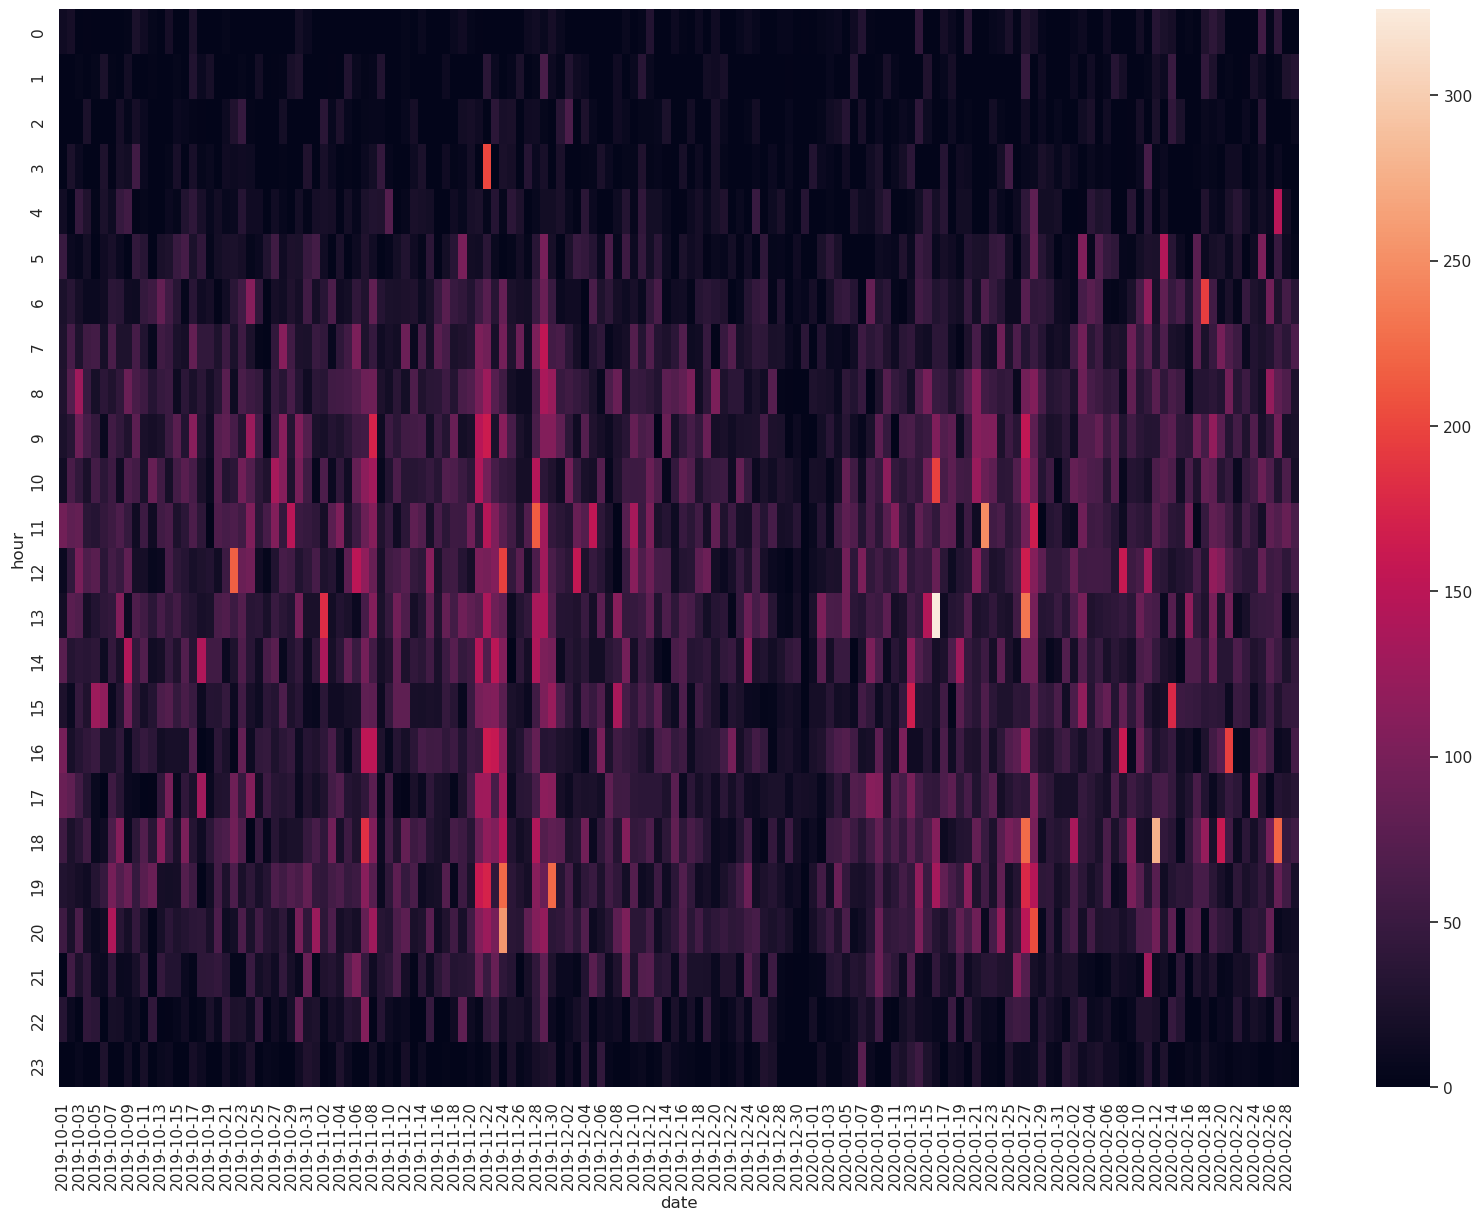

In [30]:
plt.figure(figsize=(20,14))
sns.heatmap(data=purchase_day_hour)
plt.show()

### Understanding clients

Generate dataframe of only buyers with customers granularity and the variables that interest us.

In [31]:
clients = df.loc[df.event_type == 'purchase'].groupby('user_id').agg(
    {'product_id':'count',
     'user_session':'nunique',
     'price':'mean',
     'date':'max',}
)
clients

product_id  user_session           price        date
user_id                                                        
25392526            3             1            7.38  2019-12-18
27756757            1             1           20.63  2020-01-27
50748978            9             1            1.11  2019-12-14
52747911            3             1            7.67  2019-10-10
65241811            5             1            8.36  2019-11-11
...               ...           ...             ...         ...
621995551           5             1            2.09  2020-02-29
622021687           1             1           13.33  2020-02-29
622041514           3             1            0.63  2020-02-29
622042698           3             1           28.04  2020-02-29
622065819           4             1            5.12  2020-02-29

[11040 rows x 4 columns]

Rename columns

In [32]:
clients.columns = [
    'number_total_products',
    'number_total_purchase',
    'average_price_product',
    'last_purchase_date',
]
clients

number_total_products  number_total_purchase  \
user_id                                                   
25392526                       3                      1   
27756757                       1                      1   
50748978                       9                      1   
52747911                       3                      1   
65241811                       5                      1   
...                          ...                    ...   
621995551                      5                      1   
622021687                      1                      1   
622041514                      3                      1   
622042698                      3                      1   
622065819                      4                      1   

           average_price_product last_purchase_date  
user_id                                              
25392526                    7.38         2019-12-18  
27756757                   20.63         2020-01-27  
50748978                    1.11         2019-12-14  
52747911                    7.67         2019-10-10  
65241811                    8.36         2019-11-11  
...                          ...                ...  
621995551                   2.09         2020-02-29  
622021687                  13.33         2020-02-29  
622041514                   0.63         2020-02-29  
622042698                  28.04         2020-02-29  
622065819                   5.12         2020-02-29  

[11040 rows x 4 columns]

Calculate additional variables

In [33]:
clients['total_cost'] = clients.number_total_products * clients.average_price_product
clients['products_per_purchase'] =\
    clients.number_total_products / clients.number_total_purchase
clients

number_total_products  number_total_purchase  \
user_id                                                   
25392526                       3                      1   
27756757                       1                      1   
50748978                       9                      1   
52747911                       3                      1   
65241811                       5                      1   
...                          ...                    ...   
621995551                      5                      1   
622021687                      1                      1   
622041514                      3                      1   
622042698                      3                      1   
622065819                      4                      1   

           average_price_product last_purchase_date      total_cost  \
user_id                                                               
25392526                    7.38         2019-12-18           22.14   
27756757                   20.63         2020-01-27           20.63   
50748978                    1.11         2019-12-14           10.01   
52747911                    7.67         2019-10-10           23.02   
65241811                    8.36         2019-11-11           41.79   
...                          ...                ...             ...   
621995551                   2.09         2020-02-29           10.46   
622021687                  13.33         2020-02-29           13.33   
622041514                   0.63         2020-02-29            1.90   
622042698                  28.04         2020-02-29           84.13   
622065819                   5.12         2020-02-29           20.48   

           products_per_purchase  
user_id                           
25392526                    3.00  
27756757                    1.00  
50748978                    9.00  
52747911                    3.00  
65241811                    5.00  
...                          ...  
621995551                   5.00  
622021687                   1.00  
622041514                   3.00  
622042698                   3.00  
622065819                   4.00  

[11040 rows x 6 columns]

#### How are clients distributed in terms of spending?

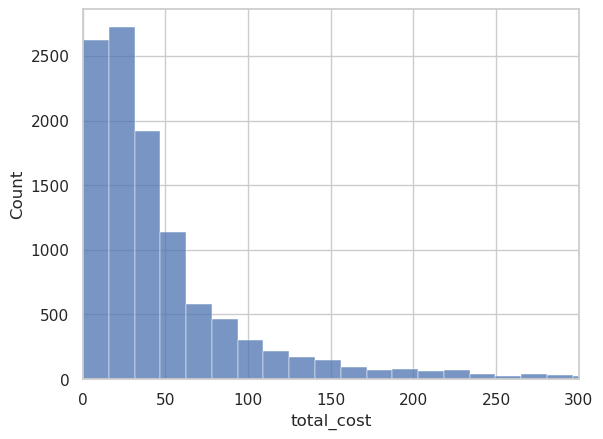

In [34]:
sns.histplot(data=clients, x='total_cost', bins=100)
plt.xlim([0,300])
plt.show()

The vast majority of customers have spent less than 50€ in the period.

#### How are customers distributed in terms of the number of purchases?

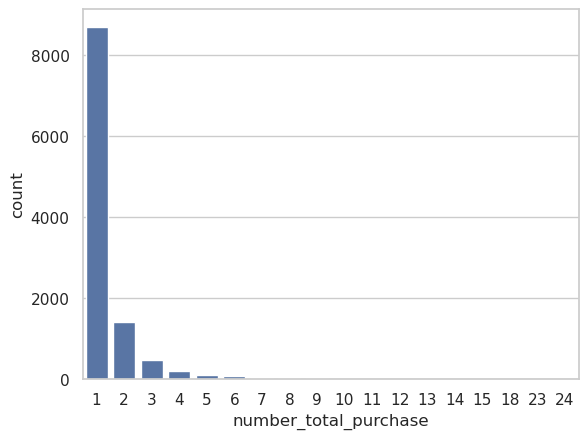

In [35]:
sns.countplot(data=clients, x='number_total_purchase')
plt.show()

**INSIGHT #3** The vast majority of customers only make one purchase.

There is a long way to go to improve this ratio through:

* email marketing with newsletters and personalized offers

#### How many products does an average customer buy in each purchase?

In [36]:
clients.products_per_purchase.describe()

count          11040.00
mean               7.78
std                9.49
min                1.00
25%                3.00
50%                5.00
75%               10.00
max              219.00
Name: products_per_purchase, dtype: float64

**INSIGHT #4** The medium purchase includes 5 products.

But 25% of customers buy more than 10 products in the same purchase.

There is a long way to go improve this ratio through:

* recommendation systems at the time of purchase

#### Which clients have generated the most income for us?

In [37]:
clients.nlargest(n=10, columns='total_cost')

number_total_products  number_total_purchase  \
user_id                                                   
573823111                    268                      2   
539751397                    236                     13   
556579890                    506                      4   
442763940                    195                      8   
561592095                     94                      3   
527739278                    244                     13   
527806771                    195                     13   
430220205                    190                      6   
491009486                    219                      1   
520501669                     64                     11   

           average_price_product last_purchase_date      total_cost  \
user_id                                                               
573823111                   5.82         2020-02-21         1559.21   
539751397                   6.16         2020-02-19         1453.37   
556579890                   2.75         2020-02-27         1392.45   
442763940                   6.37         2019-12-23         1241.53   
561592095                  11.81         2019-10-31         1109.70   
527739278                   4.39         2020-02-16         1071.00   
527806771                   4.86         2020-02-20          948.01   
430220205                   4.99         2020-02-29          947.30   
491009486                   4.32         2020-02-12          946.20   
520501669                  14.27         2020-01-17          913.01   

           products_per_purchase  
user_id                           
573823111                 134.00  
539751397                  18.15  
556579890                 126.50  
442763940                  24.38  
561592095                  31.33  
527739278                  18.77  
527806771                  15.00  
430220205                  31.67  
491009486                 219.00  
520501669                   5.82

Calculate average total per customer.

In [38]:
clients.total_cost.describe()

count          11040.00
mean              56.27
std               81.70
min                0.13
25%               16.19
50%               32.73
75%               60.26
max             1559.21
Name: total_cost, dtype: float64

INSIGHT #5 There are clients with average spending dozens of times higher than the average.

These customers should be invited to loyalty programs.

#### What is the survival of customers?

Generate cohort analysis

Prepare dataframe only with buyers and with the user and month variables.

In [39]:
cohorts  = df.loc[df.event_type == 'purchase', ['user_id', 'month']]
cohorts

user_id  month
event_time                           
2019-10-01 00:26:49  536128518     10
2019-10-01 00:26:49  536128518     10
2019-10-01 00:26:49  536128518     10
2019-10-01 00:26:49  536128518     10
2019-10-01 00:26:49  536128518     10
...                        ...    ...
2020-02-29 22:29:19  622065819      2
2020-02-29 22:29:19  622065819      2
2020-02-29 22:29:19  622065819      2
2020-02-29 22:29:19  622065819      2
2020-02-29 23:26:42  610361057      2

[127475 rows x 2 columns]

In [40]:
cohorts = pd.crosstab(cohorts.user_id, cohorts.month).reset_index()
cohorts

month    user_id  1  2  10  11  12
0       25392526  0  0   0   0   3
1       27756757  1  0   0   0   0
2       50748978  0  0   0   0   9
3       52747911  0  0   3   0   0
4       65241811  0  0   0   5   0
...          ... .. ..  ..  ..  ..
11035  621995551  0  5   0   0   0
11036  622021687  0  1   0   0   0
11037  622041514  0  3   0   0   0
11038  622042698  0  3   0   0   0
11039  622065819  0  4   0   0   0

[11040 rows x 6 columns]

Cohorts made up of one record for each user and columns for each of the months.

In [41]:
cohorts.columns = ['user', 'c4', 'c5', 'c1', 'c2', 'c3']
cohorts = cohorts.drop(columns='user')
cohorts

c4  c5  c1  c2  c3
0       0   0   0   0   3
1       1   0   0   0   0
2       0   0   0   0   9
3       0   0   3   0   0
4       0   0   0   5   0
...    ..  ..  ..  ..  ..
11035   0   5   0   0   0
11036   0   1   0   0   0
11037   0   3   0   0   0
11038   0   3   0   0   0
11039   0   4   0   0   0

[11040 rows x 5 columns]

Transform cohort values to binary

In [43]:
def transform_to_binary(variable):
    return (variable.transform(lambda x: 1 if (x > 0) else 0))

In [44]:
cohorts_binary = cohorts.apply(transform_to_binary)
cohorts_binary

c4  c5  c1  c2  c3
0       0   0   0   0   1
1       1   0   0   0   0
2       0   0   0   0   1
3       0   0   1   0   0
4       0   0   0   1   0
...    ..  ..  ..  ..  ..
11035   0   1   0   0   0
11036   0   1   0   0   0
11037   0   1   0   0   0
11038   0   1   0   0   0
11039   0   1   0   0   0

[11040 rows x 5 columns]

The first cohort will be month 2, since we want to select "new" clients (unless they were not there the previous month)

In [45]:
cohort2 = cohorts_binary.loc[(cohorts_binary.c1 == 0) & (cohorts_binary.c2 > 0)]
cohort2

c4  c5  c1  c2  c3
4      0   0   0   1   0
6      0   0   0   1   0
8      0   0   0   1   1
9      0   0   0   1   0
13     0   0   0   1   0
...   ..  ..  ..  ..  ..
7702   0   0   0   1   0
7703   0   1   0   1   0
7705   0   0   0   1   0
7708   0   0   0   1   1
7709   0   0   0   1   0

[2640 rows x 5 columns]

Calculate the percentage of customers in this cohort who have continued purchasing in the following months.

In [46]:
cohort2 = cohort2.mean().sort_index()
cohort2

c1              0.00
c2              1.00
c3              0.10
c4              0.10
c5              0.08
dtype: float64

Generate cohort 3 and 4

In [47]:
cohort3 = cohorts_binary.loc[(cohorts_binary.c2 == 0) & (cohorts_binary.c3 > 0)]
cohort3 = cohort3.mean().sort_index()
cohort3

c1              0.08
c2              0.00
c3              1.00
c4              0.10
c5              0.08
dtype: float64

Update the value of c1 for aesthetic purposes.

In [48]:
cohort3['c1'] = 0
cohort3

c1              0.00
c2              0.00
c3              1.00
c4              0.10
c5              0.08
dtype: float64

In [49]:
cohort4 = cohorts_binary.loc[(cohorts_binary.c3 == 0) & (cohorts_binary.c4 > 0)]
cohort4 = cohort4.mean().sort_index()
cohort4['c1'] = 0
cohort4['c2'] = 0
cohort4

c1              0.00
c2              0.00
c3              0.00
c4              1.00
c5              0.12
dtype: float64

Generate cohort dataframe.

In [50]:
cohorts = pd.DataFrame({'c2':cohort2, 'c3':cohort3, 'c4':cohort4}).T
cohorts = cohorts.drop(columns='c1')
cohorts

c2              c3              c4              c5
c2            1.00            0.10            0.10            0.08
c3            0.00            1.00            0.10            0.08
c4            0.00            0.00            1.00            0.12

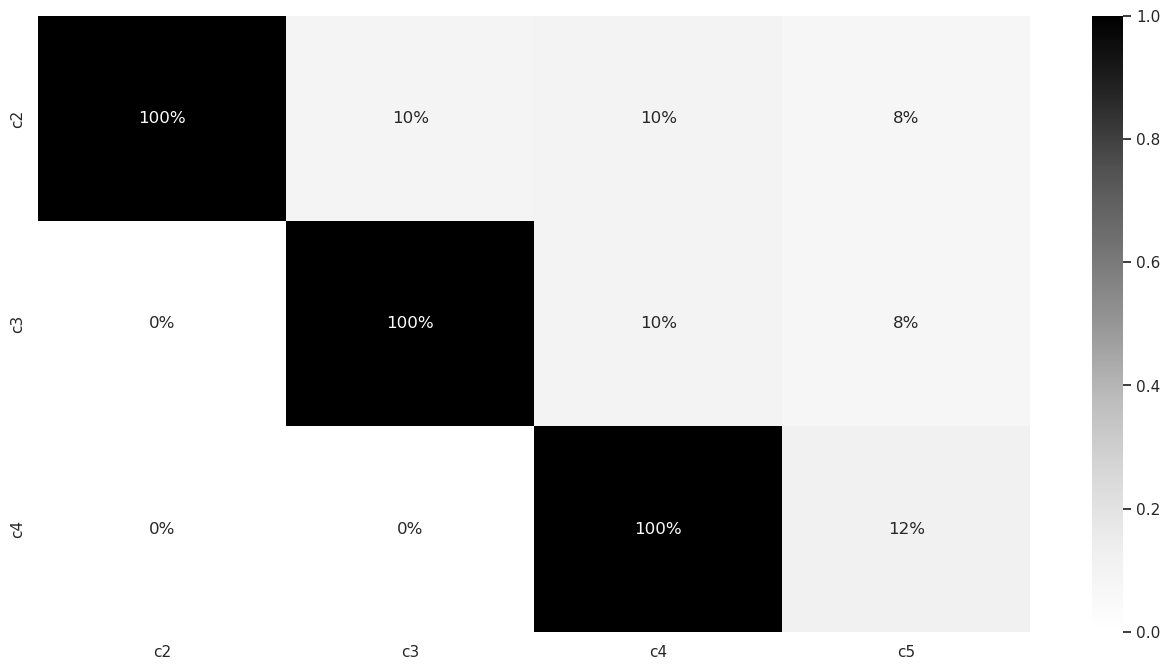

In [51]:
plt.figure(figsize=(16,8))
sns.heatmap(cohorts, cmap='Greys', annot=True, fmt='.0%')
plt.show()

**INSIGHT #6**: 90% of new customers do not buy again in the following months

#### What is the LTV(Life Time Value) of customers?

**_Taking into account that 90% of new customers do not buy again in the following months_**  we can calculate the LTV with the history we have.<br><br>

To do this, we are going to take the customers of cohort 2 and calculate the total of their purchases.

In [52]:
master_ltv = df.loc[(df.event_type == 'purchase') & (df.month != 10) & (df.month == 11),
                    'user_id'].unique().tolist()
master_ltv

[549319657,
 566322866,
 491040843,
 448281768,
 483964876,
 497964079,
 566332999,
 551059137,
 539216862,
 465338762,
 531620122,
 558863145,
 509739809,
 364758489,
 537770351,
 566346244,
 564767268,
 566371070,
 552987940,
 549507685,
 541923025,
 545903799,
 566341169,
 525016637,
 566408058,
 427260620,
 318277599,
 514961719,
 565874028,
 565061712,
 566418296,
 565712511,
 413094093,
 558100520,
 536853200,
 566442321,
 545715278,
 531724849,
 278908478,
 442255674,
 451770301,
 566457558,
 455884270,
 493511762,
 562550434,
 549804843,
 409566492,
 548199852,
 129089988,
 490402605,
 566402792,
 489063092,
 378588742,
 566452644,
 374211459,
 288721487,
 301829686,
 566332413,
 543791901,
 566519740,
 566521152,
 554284521,
 562000064,
 551116298,
 554833056,
 552510951,
 412262395,
 469431599,
 538166206,
 566532552,
 566555308,
 562691482,
 525729260,
 527739278,
 565932689,
 476731744,
 512106285,
 566539426,
 566547942,
 452799836,
 561003158,
 436122236,
 513908715,
 396

In [53]:
clients_ltv = clients[clients.index.isin(master_ltv)]
clients_ltv

number_total_products  number_total_purchase  \
user_id                                                   
65241811                       5                      1   
80577370                      10                      2   
88211255                      22                      4   
93279832                      44                      2   
94390236                       3                      1   
...                          ...                    ...   
579798049                      5                      1   
579813390                      7                      2   
579834429                      1                      1   
579900887                     11                      2   
579903865                      1                      1   

           average_price_product last_purchase_date      total_cost  \
user_id                                                               
65241811                    8.36         2019-11-11           41.79   
80577370                   10.62         2019-11-29          106.24   
88211255                    4.86         2020-02-25          106.87   
93279832                    3.19         2019-12-19          140.51   
94390236                    9.73         2019-11-07           29.20   
...                          ...                ...             ...   
579798049                   2.10         2019-11-30           10.52   
579813390                   2.98         2020-02-04           20.83   
579834429                  27.14         2019-11-30           27.14   
579900887                   5.67         2019-12-02           62.34   
579903865                   8.43         2019-11-30            8.43   

           products_per_purchase  
user_id                           
65241811                    5.00  
80577370                    5.00  
88211255                    5.50  
93279832                   22.00  
94390236                    3.00  
...                          ...  
579798049                   5.00  
579813390                   3.50  
579834429                   1.00  
579900887                   5.50  
579903865                   1.00  

[3105 rows x 6 columns]

In [54]:
clients_ltv.total_cost.describe()

count           3105.00
mean              79.59
std              113.59
min                0.13
25%               20.29
50%               41.49
75%               90.00
max             1453.37
Name: total_cost, dtype: float64

Given the variability of the mean, it would be safer to take the median.

**Insight 7**: The average LTV(Life Time Value) is 42 euros (So, for each customer that is managed to attract, it generates an average of 42 euros in the 4 months)

Applying CRO(Conversion Rate Optimization) actions will increase the LTV(Life Time Value) and therefore also the CAC(Customer Acquisition Cost), being a very important strategic advantage.

#### On which clients to run the next campaigns RFM(Recency Frequency Monetary)?

##### Calculate Frequency

In [55]:
pd.cut(clients.number_total_purchase, 5, labels=False) + 1

user_id
25392526     1
27756757     1
50748978     1
52747911     1
65241811     1
            ..
621995551    1
622021687    1
622041514    1
622042698    1
622065819    1
Name: number_total_purchase, Length: 11040, dtype: int64

In [56]:
clients['Frequency'] = pd.cut(clients.number_total_purchase, 5, labels=False) + 1
clients

number_total_products  number_total_purchase  \
user_id                                                   
25392526                       3                      1   
27756757                       1                      1   
50748978                       9                      1   
52747911                       3                      1   
65241811                       5                      1   
...                          ...                    ...   
621995551                      5                      1   
622021687                      1                      1   
622041514                      3                      1   
622042698                      3                      1   
622065819                      4                      1   

           average_price_product last_purchase_date      total_cost  \
user_id                                                               
25392526                    7.38         2019-12-18           22.14   
27756757                   20.63         2020-01-27           20.63   
50748978                    1.11         2019-12-14           10.01   
52747911                    7.67         2019-10-10           23.02   
65241811                    8.36         2019-11-11           41.79   
...                          ...                ...             ...   
621995551                   2.09         2020-02-29           10.46   
622021687                  13.33         2020-02-29           13.33   
622041514                   0.63         2020-02-29            1.90   
622042698                  28.04         2020-02-29           84.13   
622065819                   5.12         2020-02-29           20.48   

           products_per_purchase  Frequency  
user_id                                      
25392526                    3.00          1  
27756757                    1.00          1  
50748978                    9.00          1  
52747911                    3.00          1  
65241811                    5.00          1  
...                          ...        ...  
621995551                   5.00          1  
622021687                   1.00          1  
622041514                   3.00          1  
622042698                   3.00          1  
622065819                   4.00          1  

[11040 rows x 7 columns]

In [57]:
clients.groupby(['Frequency']).number_total_purchase.mean()

Frequency
1              1.31
2              7.06
3             12.00
4             16.50
5             23.50
Name: number_total_purchase, dtype: float64

##### Calculate Monetary

In [58]:
clients['Monetary'] = pd.cut(clients.loc[:,'total_cost'],5,labels=False) + 1
clients

number_total_products  number_total_purchase  \
user_id                                                   
25392526                       3                      1   
27756757                       1                      1   
50748978                       9                      1   
52747911                       3                      1   
65241811                       5                      1   
...                          ...                    ...   
621995551                      5                      1   
622021687                      1                      1   
622041514                      3                      1   
622042698                      3                      1   
622065819                      4                      1   

           average_price_product last_purchase_date      total_cost  \
user_id                                                               
25392526                    7.38         2019-12-18           22.14   
27756757                   20.63         2020-01-27           20.63   
50748978                    1.11         2019-12-14           10.01   
52747911                    7.67         2019-10-10           23.02   
65241811                    8.36         2019-11-11           41.79   
...                          ...                ...             ...   
621995551                   2.09         2020-02-29           10.46   
622021687                  13.33         2020-02-29           13.33   
622041514                   0.63         2020-02-29            1.90   
622042698                  28.04         2020-02-29           84.13   
622065819                   5.12         2020-02-29           20.48   

           products_per_purchase  Frequency  Monetary  
user_id                                                
25392526                    3.00          1         1  
27756757                    1.00          1         1  
50748978                    9.00          1         1  
52747911                    3.00          1         1  
65241811                    5.00          1         1  
...                          ...        ...       ...  
621995551                   5.00          1         1  
622021687                   1.00          1         1  
622041514                   3.00          1         1  
622042698                   3.00          1         1  
622065819                   4.00          1         1  

[11040 rows x 8 columns]

In [59]:
clients.groupby('Monetary').total_cost.mean()

Monetary
1             48.33
2            410.93
3            764.82
4           1043.96
5           1468.34
Name: total_cost, dtype: float64

##### Calculate Recency

In [60]:
most_recent_date = clients.last_purchase_date.max()
most_recent_date

datetime.date(2020, 2, 29)

In [61]:
clients['last_purchase_days'] = clients.last_purchase_date.transform(
    lambda x: most_recent_date - x).dt.days
clients

number_total_products  number_total_purchase  \
user_id                                                   
25392526                       3                      1   
27756757                       1                      1   
50748978                       9                      1   
52747911                       3                      1   
65241811                       5                      1   
...                          ...                    ...   
621995551                      5                      1   
622021687                      1                      1   
622041514                      3                      1   
622042698                      3                      1   
622065819                      4                      1   

           average_price_product last_purchase_date      total_cost  \
user_id                                                               
25392526                    7.38         2019-12-18           22.14   
27756757                   20.63         2020-01-27           20.63   
50748978                    1.11         2019-12-14           10.01   
52747911                    7.67         2019-10-10           23.02   
65241811                    8.36         2019-11-11           41.79   
...                          ...                ...             ...   
621995551                   2.09         2020-02-29           10.46   
622021687                  13.33         2020-02-29           13.33   
622041514                   0.63         2020-02-29            1.90   
622042698                  28.04         2020-02-29           84.13   
622065819                   5.12         2020-02-29           20.48   

           products_per_purchase  Frequency  Monetary  last_purchase_days  
user_id                                                                    
25392526                    3.00          1         1                  73  
27756757                    1.00          1         1                  33  
50748978                    9.00          1         1                  77  
52747911                    3.00          1         1                 142  
65241811                    5.00          1         1                 110  
...                          ...        ...       ...                 ...  
621995551                   5.00          1         1                   0  
622021687                   1.00          1         1                   0  
622041514                   3.00          1         1                   0  
622042698                   3.00          1         1                   0  
622065819                   4.00          1         1                   0  

[11040 rows x 9 columns]

In [62]:
clients['Recency'] = pd.cut(clients.last_purchase_days,5,labels=False) + 1
clients

number_total_products  number_total_purchase  \
user_id                                                   
25392526                       3                      1   
27756757                       1                      1   
50748978                       9                      1   
52747911                       3                      1   
65241811                       5                      1   
...                          ...                    ...   
621995551                      5                      1   
622021687                      1                      1   
622041514                      3                      1   
622042698                      3                      1   
622065819                      4                      1   

           average_price_product last_purchase_date      total_cost  \
user_id                                                               
25392526                    7.38         2019-12-18           22.14   
27756757                   20.63         2020-01-27           20.63   
50748978                    1.11         2019-12-14           10.01   
52747911                    7.67         2019-10-10           23.02   
65241811                    8.36         2019-11-11           41.79   
...                          ...                ...             ...   
621995551                   2.09         2020-02-29           10.46   
622021687                  13.33         2020-02-29           13.33   
622041514                   0.63         2020-02-29            1.90   
622042698                  28.04         2020-02-29           84.13   
622065819                   5.12         2020-02-29           20.48   

           products_per_purchase  Frequency  Monetary  last_purchase_days  \
user_id                                                                     
25392526                    3.00          1         1                  73   
27756757                    1.00          1         1                  33   
50748978                    9.00          1         1                  77   
52747911                    3.00          1         1                 142   
65241811                    5.00          1         1                 110   
...                          ...        ...       ...                 ...   
621995551                   5.00          1         1                   0   
622021687                   1.00          1         1                   0   
622041514                   3.00          1         1                   0   
622042698                   3.00          1         1                   0   
622065819                   4.00          1         1                   0   

           Recency  
user_id             
25392526         3  
27756757         2  
50748978         3  
52747911         5  
65241811         4  
...            ...  
621995551        1  
622021687        1  
622041514        1  
622042698        1  
622065819        1  

[11040 rows x 10 columns]

In [63]:
clients.groupby('Recency').last_purchase_days.mean()

Recency
1             14.62
2             43.04
3             75.94
4            103.85
5            135.91
Name: last_purchase_days, dtype: float64

To standardize its interpretation with the rest of the dimensions, we are going to turn it around.

In [64]:
clients['Recency'] = 6 - clients.Recency
clients.groupby('Recency').last_purchase_days.mean()

Recency
1            135.91
2            103.85
3             75.94
4             43.04
5             14.62
Name: last_purchase_days, dtype: float64

Generate a variable that unifies the 3

In [65]:
clients['valueRFM'] = clients.Recency + clients.Frequency + clients.Monetary
clients['RFM'] = clients.apply(lambda x: str(x.Recency) + str(x.Frequency)
                    + str(x.Monetary), axis=1)
clients

number_total_products  number_total_purchase  \
user_id                                                   
25392526                       3                      1   
27756757                       1                      1   
50748978                       9                      1   
52747911                       3                      1   
65241811                       5                      1   
...                          ...                    ...   
621995551                      5                      1   
622021687                      1                      1   
622041514                      3                      1   
622042698                      3                      1   
622065819                      4                      1   

           average_price_product last_purchase_date      total_cost  \
user_id                                                               
25392526                    7.38         2019-12-18           22.14   
27756757                   20.63         2020-01-27           20.63   
50748978                    1.11         2019-12-14           10.01   
52747911                    7.67         2019-10-10           23.02   
65241811                    8.36         2019-11-11           41.79   
...                          ...                ...             ...   
621995551                   2.09         2020-02-29           10.46   
622021687                  13.33         2020-02-29           13.33   
622041514                   0.63         2020-02-29            1.90   
622042698                  28.04         2020-02-29           84.13   
622065819                   5.12         2020-02-29           20.48   

           products_per_purchase  Frequency  Monetary  last_purchase_days  \
user_id                                                                     
25392526                    3.00          1         1                  73   
27756757                    1.00          1         1                  33   
50748978                    9.00          1         1                  77   
52747911                    3.00          1         1                 142   
65241811                    5.00          1         1                 110   
...                          ...        ...       ...                 ...   
621995551                   5.00          1         1                   0   
622021687                   1.00          1         1                   0   
622041514                   3.00          1         1                   0   
622042698                   3.00          1         1                   0   
622065819                   4.00          1         1                   0   

           Recency  valueRFM  RFM  
user_id                            
25392526         3         5  311  
27756757         4         6  411  
50748978         3         5  311  
52747911         1         3  111  
65241811         2         4  211  
...            ...       ...  ...  
621995551        5         7  511  
622021687        5         7  511  
622041514        5         7  511  
622042698        5         7  511  
622065819        5         7  511  

[11040 rows x 12 columns]

#### Build Minicube

Select metrics and dimensions

In [66]:
metrics = ['number_total_products', 'number_total_purchase', 'total_cost',]
dimensions = ['Recency', 'Frequency', 'Monetary', 'RFM', 'valueRFM']
minicube = clients[dimensions + metrics]
minicube

Recency  Frequency  Monetary  RFM  valueRFM  number_total_products  \
user_id                                                                         
25392526         3          1         1  311         5                      3   
27756757         4          1         1  411         6                      1   
50748978         3          1         1  311         5                      9   
52747911         1          1         1  111         3                      3   
65241811         2          1         1  211         4                      5   
...            ...        ...       ...  ...       ...                    ...   
621995551        5          1         1  511         7                      5   
622021687        5          1         1  511         7                      1   
622041514        5          1         1  511         7                      3   
622042698        5          1         1  511         7                      3   
622065819        5          1         1  511         7                      4   

           number_total_purchase      total_cost  
user_id                                           
25392526                       1           22.14  
27756757                       1           20.63  
50748978                       1           10.01  
52747911                       1           23.02  
65241811                       1           41.79  
...                          ...             ...  
621995551                      1           10.46  
622021687                      1           13.33  
622041514                      1            1.90  
622042698                      1           84.13  
622065819                      1           20.48  

[11040 rows x 8 columns]

Convert dimensions to transactional

In [67]:
minicube = minicube.melt(id_vars=metrics)
minicube

number_total_products  number_total_purchase      total_cost  variable  \
0                          3                      1           22.14   Recency   
1                          1                      1           20.63   Recency   
2                          9                      1           10.01   Recency   
3                          3                      1           23.02   Recency   
4                          5                      1           41.79   Recency   
...                      ...                    ...             ...       ...   
55195                      5                      1           10.46  valueRFM   
55196                      1                      1           13.33  valueRFM   
55197                      3                      1            1.90  valueRFM   
55198                      3                      1           84.13  valueRFM   
55199                      4                      1           20.48  valueRFM   

      value  
0         3  
1         4  
2         3  
3         1  
4         2  
...     ...  
55195     7  
55196     7  
55197     7  
55198     7  
55199     7  

[55200 rows x 5 columns]

Calculate statistics of the metrics grouped by dimensions

In [68]:
minicube = minicube.groupby(['variable','value'], as_index=False)[metrics].mean()
minicube

variable value  number_total_products  number_total_purchase  \
0   Frequency     1                  10.61                   1.31   
1   Frequency     2                  71.37                   7.06   
2   Frequency     3                 123.55                  12.00   
3   Frequency     4                 156.50                  16.50   
4   Frequency     5                 123.50                  23.50   
..        ...   ...                    ...                    ...   
58   valueRFM     9                  97.96                   7.25   
59   valueRFM    10                 140.78                  10.22   
60   valueRFM    11                 291.00                   5.75   
61   valueRFM    12                 189.80                  16.60   
62   valueRFM    13                 178.50                  18.00   

        total_cost  
0            52.06  
1           320.31  
2           643.13  
3           558.93  
4           650.67  
..             ...  
58          491.56  
59          625.39  
60         1189.31  
61          833.43  
62         1134.95  

[63 rows x 5 columns]

Analyze minicube RFM

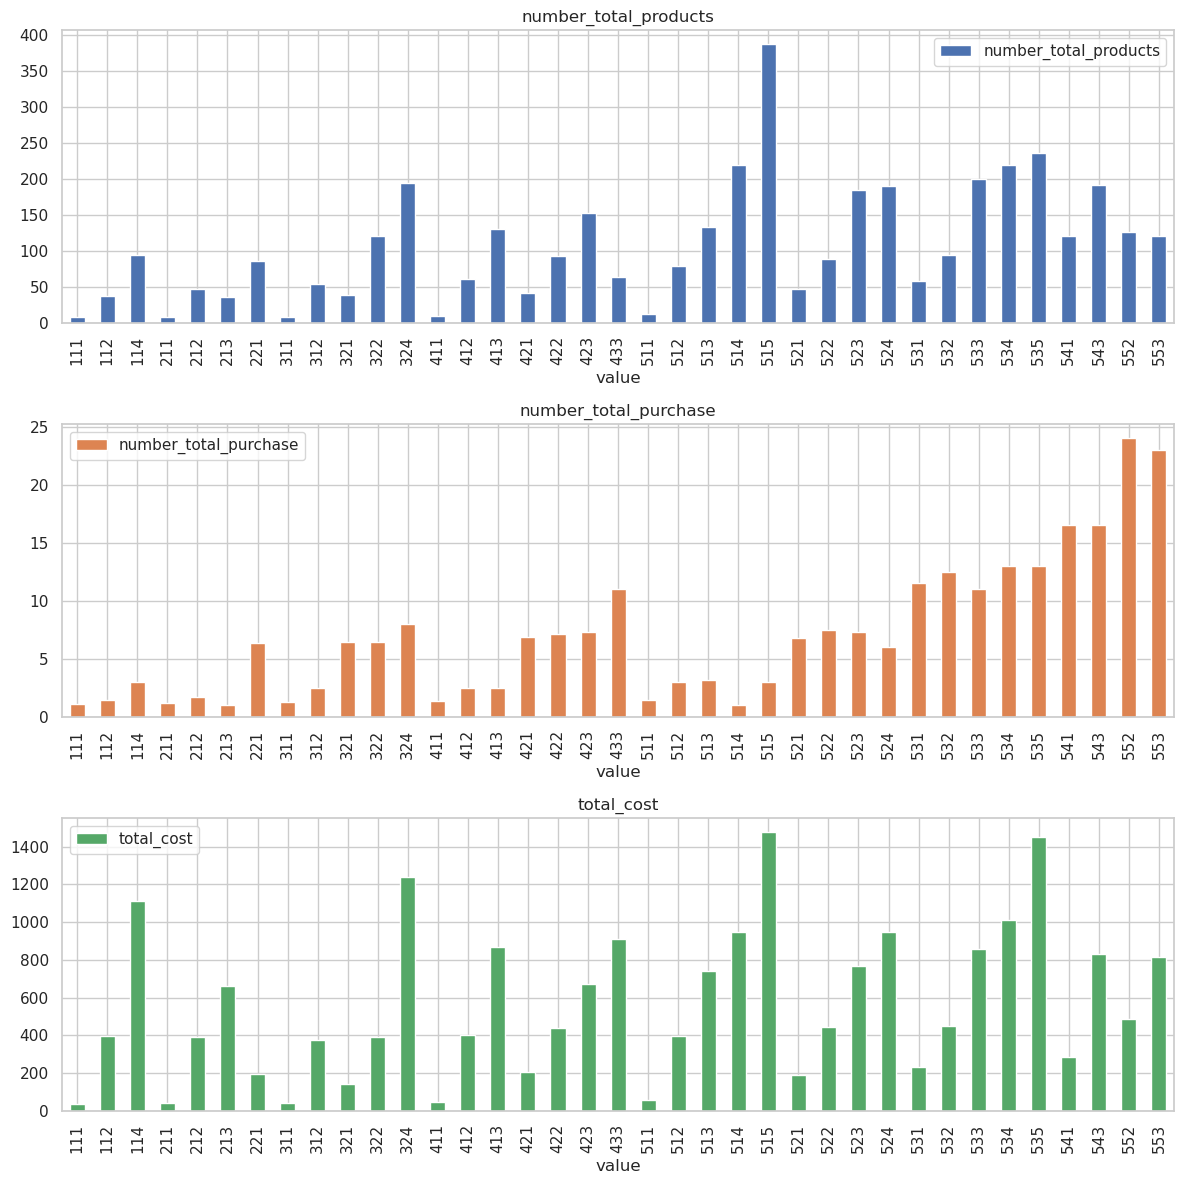

In [69]:
minicube[minicube.variable == 'RFM'].set_index('value').plot\
    .bar(subplots=True, figsize=(12,12), sharex=False)
plt.tight_layout()
plt.show()

In [70]:
minicube[minicube.variable == 'Frequency']

variable value  number_total_products  number_total_purchase  \
0  Frequency     1                  10.61                   1.31   
1  Frequency     2                  71.37                   7.06   
2  Frequency     3                 123.55                  12.00   
3  Frequency     4                 156.50                  16.50   
4  Frequency     5                 123.50                  23.50   

       total_cost  
0           52.06  
1          320.31  
2          643.13  
3          558.93  
4          650.67

Analyze graphically

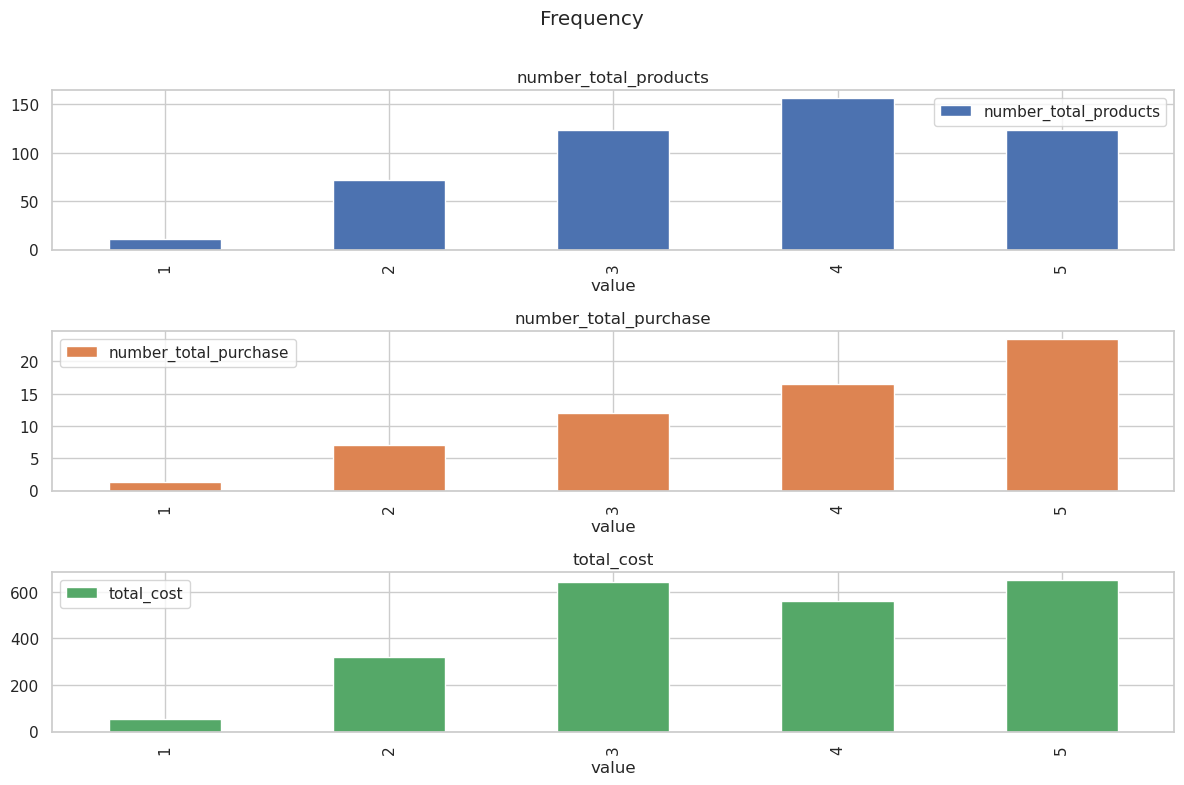

In [71]:
minicube[minicube.variable == 'Frequency'].set_index('value').plot\
    .bar(subplots=True, figsize=(12,8), sharex=False)
plt.suptitle('Frequency\n')
plt.tight_layout()
plt.show()

In [73]:
minicube[minicube.variable == 'Monetary']

variable value  number_total_products  number_total_purchase  \
5  Monetary     1                  10.12                   1.34   
6  Monetary     2                  74.26                   4.31   
7  Monetary     3                 138.41                   6.86   
8  Monetary     4                 189.50                   7.33   
9  Monetary     5                 336.67                   6.33   

       total_cost  
5           48.33  
6          410.93  
7          764.82  
8         1043.96  
9         1468.34

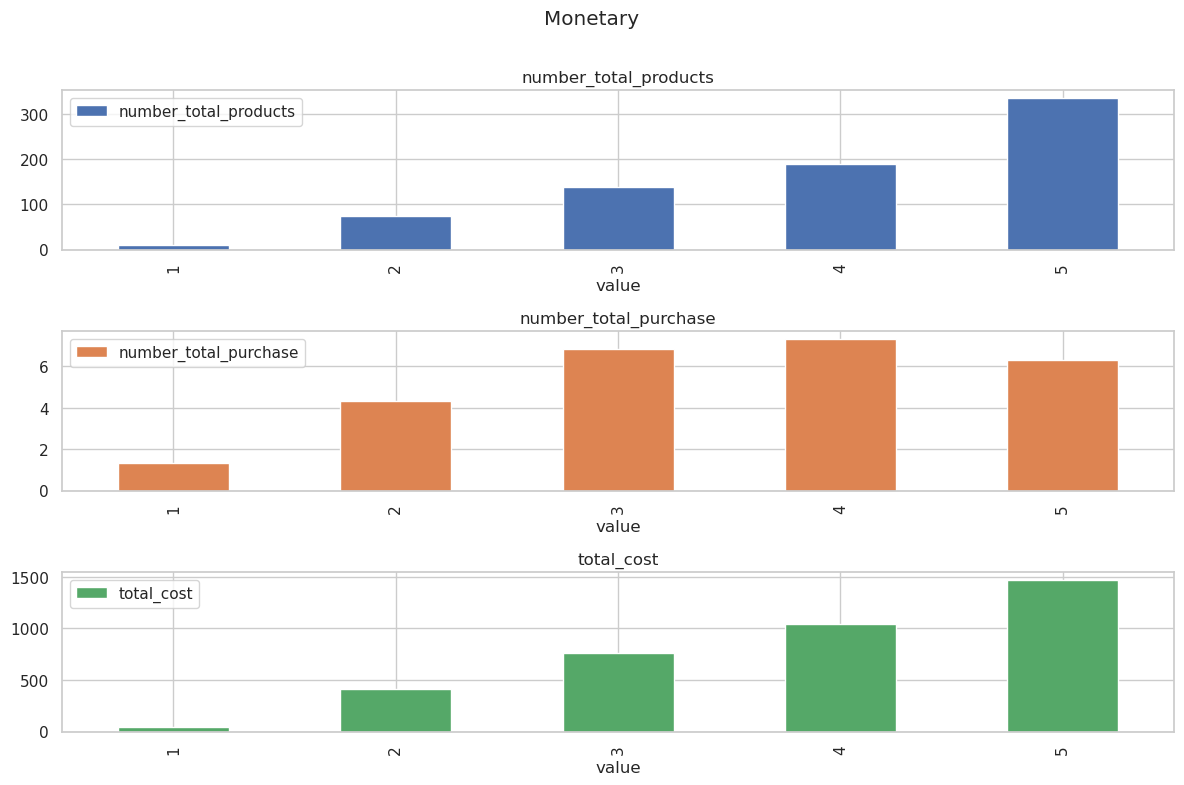

In [74]:
minicube[minicube.variable == 'Monetary'].set_index('value').plot\
    .bar(subplots=True, figsize=(12,8), sharex=False)
plt.suptitle('Monetary\n')
plt.tight_layout()
plt.show()

In [75]:
minicube[minicube.variable == 'valueRFM']

variable value  number_total_products  number_total_purchase  \
52  valueRFM     3                   7.95                   1.08   
53  valueRFM     4                   9.03                   1.17   
54  valueRFM     5                   9.31                   1.27   
55  valueRFM     6                  10.72                   1.38   
56  valueRFM     7                  12.63                   1.54   
57  valueRFM     8                  66.09                   5.06   
58  valueRFM     9                  97.96                   7.25   
59  valueRFM    10                 140.78                  10.22   
60  valueRFM    11                 291.00                   5.75   
61  valueRFM    12                 189.80                  16.60   
62  valueRFM    13                 178.50                  18.00   

        total_cost  
52           39.23  
53           44.39  
54           46.06  
55           53.05  
56           60.40  
57          312.86  
58          491.56  
59          625.39  
60         1189.31  
61          833.43  
62         1134.95

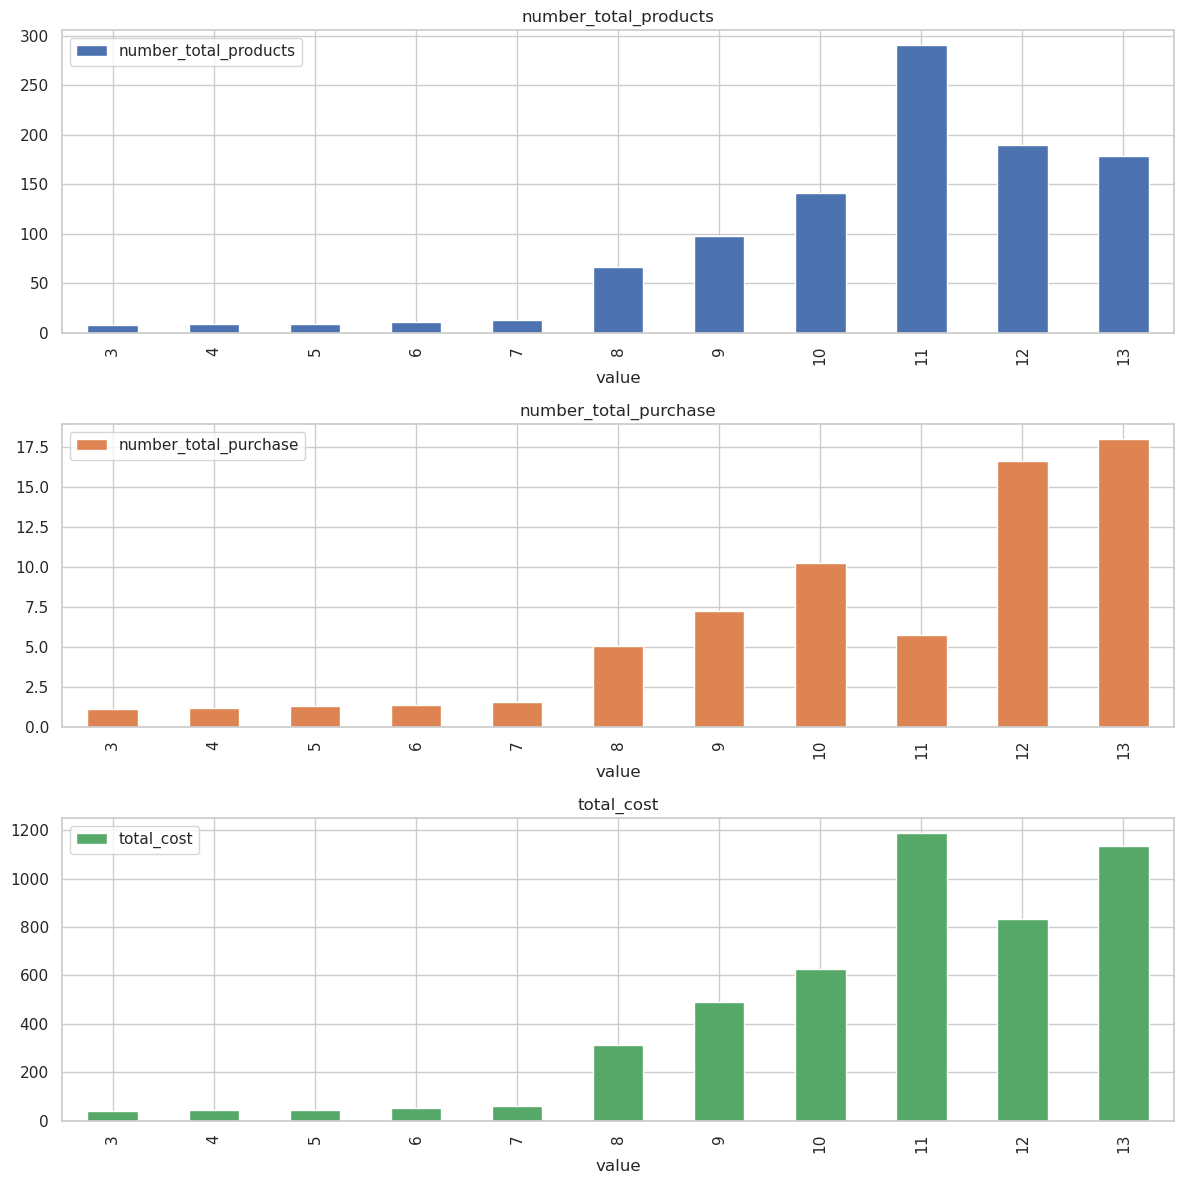

In [76]:
minicube[minicube.variable == 'valueRFM'].set_index('value').plot\
    .bar(subplots=True, figsize=(12,12), sharex=False)
plt.tight_layout()
plt.show()

With this analysis we are able to identify the clients who are most likely to respond best to new campaigns.

## Analysis by product

Generate dataframe at product level

In [77]:
product = df.groupby(['product_id', 'event_type']).size()
product = product.unstack(level=1).fillna(0)
product

event_type            cart        purchase  remove_from_cart            view
product_id                                                                  
3752                  0.00            0.00              0.00           10.00
3762                124.00           28.00             51.00          258.00
3763                 10.00            2.00              2.00           51.00
3771                  0.00            0.00              0.00            9.00
3774                 26.00            7.00             12.00           76.00
...                    ...             ...               ...             ...
5932537               1.00            0.00              0.00            1.00
5932538               0.00            0.00              0.00            1.00
5932540               1.00            0.00              0.00            2.00
5932578               0.00            0.00              0.00            1.00
5932585               0.00            0.00              0.00            2.00

[45327 rows x 4 columns]

Add price

In [78]:
price_list =df.groupby('product_id', as_index=False).price.mean()
price_list

product_id           price
0            3752           15.71
1            3762           19.29
2            3763           16.00
3            3771           15.08
4            3774           15.92
...           ...             ...
45322     5932537            1.43
45323     5932538            1.43
45324     5932540            1.43
45325     5932578            6.02
45326     5932585            6.33

[45327 rows x 2 columns]

In [79]:
product = pd.merge(left=product, right=price_list, how='left', on='product_id')
product.head()

product_id            cart        purchase  remove_from_cart  \
0        3752            0.00            0.00              0.00   
1        3762          124.00           28.00             51.00   
2        3763           10.00            2.00              2.00   
3        3771            0.00            0.00              0.00   
4        3774           26.00            7.00             12.00   

             view           price  
0           10.00           15.71  
1          258.00           19.29  
2           51.00           16.00  
3            9.00           15.08  
4           76.00           15.92

Sort columns

In [80]:
product = product[['product_id', 'view', 'cart', 'remove_from_cart', 'purchase', 'price']]
product.head()

product_id            view            cart  remove_from_cart  \
0        3752           10.00            0.00              0.00   
1        3762          258.00          124.00             51.00   
2        3763           51.00           10.00              2.00   
3        3771            9.00            0.00              0.00   
4        3774           76.00           26.00             12.00   

         purchase           price  
0            0.00           15.71  
1           28.00           19.29  
2            2.00           16.00  
3            0.00           15.08  
4            7.00           15.92

### What are the best-selling products?

In [81]:
product.sort_values(by='purchase', ascending=False)[0:20]

product_id            view            cart  remove_from_cart  \
16807     5809910         9192.00         2768.00            989.00   
28178     5854897          624.00         2277.00            632.00   
6644      5700037         1150.00         2332.00            582.00   
314          5304          515.00         1138.00            351.00   
9900      5751422         2204.00         1102.00            497.00   
15394     5802432          701.00         2289.00            613.00   
16809     5809912         3059.00         1342.00            685.00   
18415     5815662         1218.00         1588.00            515.00   
9862      5751383         2341.00         1025.00            447.00   
14043     5792800         1527.00          901.00            394.00   
26312     5849033         2098.00         1027.00            459.00   
5386      5686925          344.00         1541.00            396.00   
6653      5700046          432.00         1220.00            300.00   
1761      5528035         1145.00          700.00            317.00   
22111     5833330          680.00          573.00            263.00   
16808     5809911         1923.00          826.00            442.00   
18525     5816170         1642.00          748.00            387.00   
5420      5687151          508.00          532.00            227.00   
8232      5729864          160.00          494.00            169.00   
24787     5843836          165.00          928.00            210.00   

             purchase           price  
16807          764.00            5.21  
28178          483.00            0.32  
6644           361.00            0.40  
314            340.00            0.32  
9900           331.00           10.87  
15394          322.00            0.32  
16809          321.00            5.19  
18415          310.00            0.91  
9862           298.00           10.24  
14043          285.00           10.25  
26312          278.00           10.25  
5386           231.00            0.35  
6653           215.00            0.40  
1761           200.00            9.44  
22111          194.00            0.92  
16808          189.00            5.21  
18525          182.00            5.22  
5420           179.00            1.90  
8232           176.00            0.41  
24787          172.00            0.38

Possibly we would be able to increase sales and the average ticket simply by highlighting these products in the store.

### What are the least selling products?

In [82]:
product[product.purchase == 0]

product_id            view            cart  remove_from_cart  \
0            3752           10.00            0.00              0.00   
3            3771            9.00            0.00              0.00   
6            3790           10.00            0.00              0.00   
8            3809            2.00            0.00              0.00   
9            3812            1.00            0.00              0.00   
...           ...             ...             ...               ...   
45322     5932537            1.00            1.00              0.00   
45323     5932538            1.00            0.00              0.00   
45324     5932540            2.00            1.00              0.00   
45325     5932578            1.00            0.00              0.00   
45326     5932585            2.00            0.00              0.00   

             purchase           price  
0                0.00           15.71  
3                0.00           15.08  
6                0.00            7.92  
8                0.00           12.54  
9                0.00           12.54  
...               ...             ...  
45322            0.00            1.43  
45323            0.00            1.43  
45324            0.00            1.43  
45325            0.00            6.02  
45326            0.00            6.33  

[21850 rows x 6 columns]


***INSIGHT #8***: Almost half of the products have not had any sales in the 5 months of history.

A whole new analysis could be started on these products:

* They are not visible?
* Are they seen but not bought?
* Is it because they are replaced by other products?
* Is it because they are much cheaper in the competition?
* etc.

They could be removed from the catalog, or at least from the store, newsletter, etc., so that they do not take up space of the products that are sold.

### What is the relationship between price and sales volume?

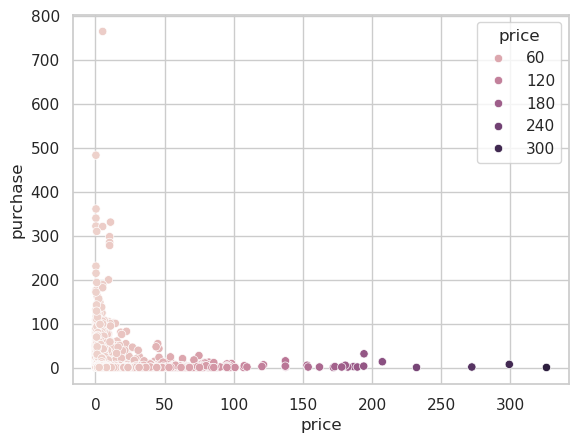

In [83]:
sns.scatterplot(data=product[product.purchase > 0], x='price', y='purchase', hue='price')
plt.show()

Conclusions:
* There is this price sensitivity within customers, where lower priced products sell more.
* Furthermore, the increase in sales occurs in lower priced products below 20 euros.

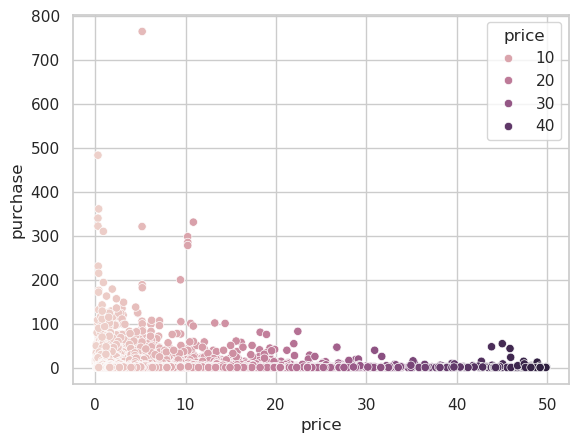

In [84]:
sns.scatterplot(data=product[(product.purchase > 0) & (product.price < 50)],
                x='price', y='purchase', hue='price')
plt.show()

There is a relationship, when the price rises, the volume of purchases decreases

### Are there products that customers regret and remove more from the cart?

In [85]:
product.head()

product_id            view            cart  remove_from_cart  \
0        3752           10.00            0.00              0.00   
1        3762          258.00          124.00             51.00   
2        3763           51.00           10.00              2.00   
3        3771            9.00            0.00              0.00   
4        3774           76.00           26.00             12.00   

         purchase           price  
0            0.00           15.71  
1           28.00           19.29  
2            2.00           16.00  
3            0.00           15.08  
4            7.00           15.92

In [86]:
product.insert(loc=4,
               column='remove_from_cart_perc',
               value=product.remove_from_cart / product.cart * 100)
product

product_id            view            cart  remove_from_cart  \
0            3752           10.00            0.00              0.00   
1            3762          258.00          124.00             51.00   
2            3763           51.00           10.00              2.00   
3            3771            9.00            0.00              0.00   
4            3774           76.00           26.00             12.00   
...           ...             ...             ...               ...   
45322     5932537            1.00            1.00              0.00   
45323     5932538            1.00            0.00              0.00   
45324     5932540            2.00            1.00              0.00   
45325     5932578            1.00            0.00              0.00   
45326     5932585            2.00            0.00              0.00   

       remove_from_cart_perc        purchase           price  
0                        NaN            0.00           15.71  
1                      41.13           28.00           19.29  
2                      20.00            2.00           16.00  
3                        NaN            0.00           15.08  
4                      46.15            7.00           15.92  
...                      ...             ...             ...  
45322                   0.00            0.00            1.43  
45323                    NaN            0.00            1.43  
45324                   0.00            0.00            1.43  
45325                    NaN            0.00            6.02  
45326                    NaN            0.00            6.33  

[45327 rows x 7 columns]

In [87]:
product[product.cart > 30].sort_values('remove_from_cart_perc', ascending=False)[0:30]

product_id            view            cart  remove_from_cart  \
21617     5830537           35.00           37.00             49.00   
16742     5809817            5.00           33.00             40.00   
37937     5893670           36.00           35.00             41.00   
6222      5696152           81.00           41.00             47.00   
17716     5813067           48.00           43.00             48.00   
7932      5724600           36.00           34.00             37.00   
12049     5773344           38.00           38.00             41.00   
13942     5789608           57.00           32.00             34.00   
14330     5797131           26.00           38.00             40.00   
6235      5696184           38.00           41.00             43.00   
6650      5700043            5.00           48.00             50.00   
12079     5773374           43.00           49.00             51.00   
10535     5758952           77.00           38.00             39.00   
7867      5723522           56.00           46.00             47.00   
7866      5723521           45.00           57.00             58.00   
10701     5760769           38.00           31.00             31.00   
28667     5857018           33.00           32.00             32.00   
23214     5837651          104.00           37.00             37.00   
39359     5900645           47.00           33.00             33.00   
3005      5619864           80.00           47.00             47.00   
27643     5853242           47.00           43.00             43.00   
14151     5794155           38.00           46.00             45.00   
27769     5853567           70.00           45.00             44.00   
23833     5839637           55.00           43.00             42.00   
21606     5830526           59.00           40.00             39.00   
30744     5863824           20.00           34.00             33.00   
19050     5819111           35.00           32.00             31.00   
8056      5726161           63.00           32.00             31.00   
33396     5875280           53.00           32.00             31.00   
17706     5813057           42.00           31.00             30.00   

       remove_from_cart_perc        purchase           price  
21617                 132.43            8.00            1.73  
16742                 121.21            9.00            0.47  
37937                 117.14            3.00            4.89  
6222                  114.63           12.00            2.37  
17716                 111.63            5.00            1.71  
7932                  108.82            6.00            2.48  
12049                 107.89            7.00            2.59  
13942                 106.25            7.00            4.69  
14330                 105.26            7.00            4.43  
6235                  104.88            7.00            2.37  
6650                  104.17           10.00            0.40  
12079                 104.08           10.00            2.77  
10535                 102.63            7.00            2.36  
7867                  102.17           11.00            2.61  
7866                  101.75           11.00            2.59  
10701                 100.00            6.00            2.62  
28667                 100.00            7.00            3.15  
23214                 100.00            7.00            5.50  
39359                 100.00            8.00            4.38  
3005                  100.00            8.00            2.84  
27643                 100.00            6.00            3.15  
14151                  97.83            6.00            1.73  
27769                  97.78            5.00            3.91  
23833                  97.67           12.00            2.37  
21606                  97.50            6.00            3.93  
30744                  97.06            3.00            4.50  
19050                  96.88            8.00            1.57  
8056                   96.88            2

It would be necessary to see why these products are removed more times than they are added.

### What are the most viewed products?

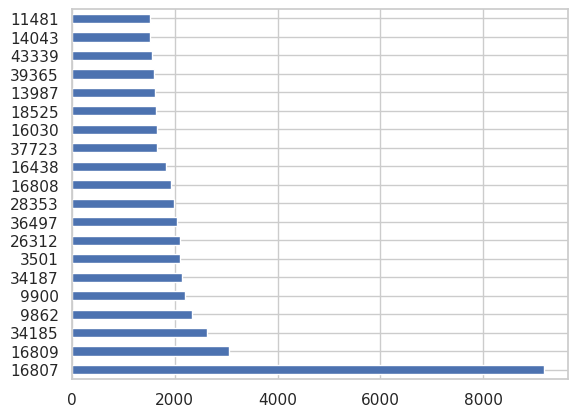

In [88]:
product.view.sort_values(ascending=False)[0:20].plot.barh()
plt.show()

Possibly we would be able to increase sales and the average ticket simply by highlighting these products in the store, provided that in addition to being seen they are also sold.

### Are there products desired but not purchased?

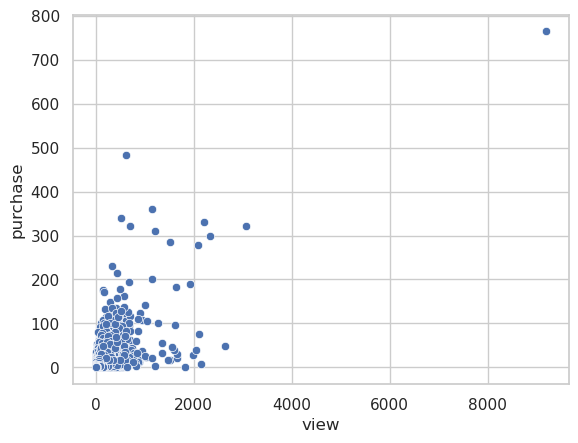

In [89]:
sns.scatterplot(data=product, x='view', y='purchase')
plt.show()

Remove the outlier and zoom in on the many views few purchases window.

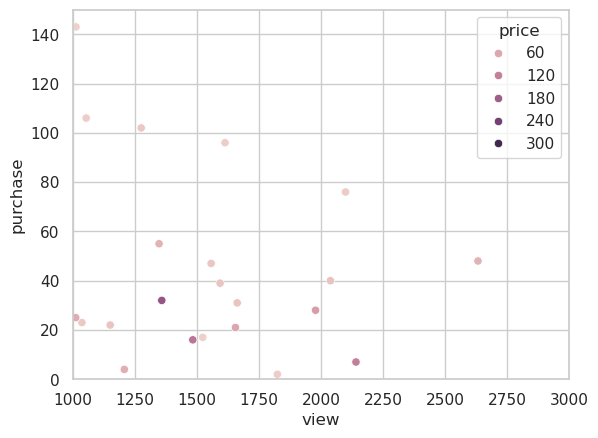

In [90]:
sns.scatterplot(data=product[product.view < 4000], x='view', y='purchase', hue='price')
plt.xlim(1000, 3000)
plt.ylim(0, 150)
plt.show()

There is an opportunity with these products, because for some reason they generate interest from customers, but in the end they do not buy them.

An analysis would have to be done on them.

## Recommendation systems based on item-item collaborative filtering

Most selled products

In [91]:
best_sellers = product.sort_values(by='purchase', ascending=False).product_id[0:100]
best_sellers

16807    5809910
28178    5854897
6644     5700037
314         5304
9900     5751422
          ...   
9732     5749149
30395    5862564
9778     5749720
22751    5835859
22116    5833335
Name: product_id, Length: 100, dtype: int64

Generate temporary dataframe filtered by the best-selling products.

In [92]:
temp = df[df.product_id.isin(best_sellers)]
print(temp.shape)
temp.head()

(159669, 16)


user_id                          user_session  \
event_time                                                             
2019-10-01 00:26:49  536128518  a31f0991-645e-4472-a012-95eb2f814568   
2019-10-01 00:46:20  555415545  b9cc1771-9062-4e08-a3ad-363314cd17d8   
2019-10-01 00:48:13  555415545  b9cc1771-9062-4e08-a3ad-363314cd17d8   
2019-10-01 00:52:39  555415545  b9cc1771-9062-4e08-a3ad-363314cd17d8   
2019-10-01 01:33:26  555456891  b3239dc3-f107-4034-a507-4c41f646e38a   

                             category_id event_type  product_id  \
event_time                                                        
2019-10-01 00:26:49  1487580006317032337   purchase     5815662   
2019-10-01 00:46:20  1602943681873052386       view     5809912   
2019-10-01 00:48:13  1602943681873052386       view     5816170   
2019-10-01 00:52:39  1487580005092295511       view     5815730   
2019-10-01 01:33:26  1487580005092295511       view     5849033   

                              price        date  year  month  day  hour  \
event_time                                                                
2019-10-01 00:26:49            0.92  2019-10-01  2019     10    1     0   
2019-10-01 00:46:20            5.24  2019-10-01  2019     10    1     0   
2019-10-01 00:48:13            5.24  2019-10-01  2019     10    1     0   
2019-10-01 00:52:39           10.95  2019-10-01  2019     10    1     0   
2019-10-01 01:33:26           10.32  2019-10-01  2019     10    1     1   

                     minute  second  festive  black_friday  valentin_day  
event_time                                                                
2019-10-01 00:26:49      26      49        0             0             0  
2019-10-01 00:46:20      46      20        0             0             0  
2019-10-01 00:48:13      48      13        0             0             0  
2019-10-01 00:52:39      52      39        0             0             0  
2019-10-01 01:33:26      33      26        0             0             0

Generate spares matrix of number of purchases of each item of each user

In [93]:
user_item = temp[temp.event_type == 'purchase'].groupby(['user_id','product_id'])\
    .size().unstack(level=1).fillna(0)
user_item

product_id         4497            4600            4768            4938     \
user_id                                                                      
25392526              0.00            0.00            0.00            0.00   
50748978              0.00            0.00            0.00            0.00   
74332980              0.00            0.00            0.00            1.00   
80577370              0.00            0.00            0.00            0.00   
88211255              0.00            0.00            0.00            0.00   
...                    ...             ...             ...             ...   
621646584             0.00            0.00            0.00            0.00   
621788730             0.00            0.00            0.00            0.00   
621925941             1.00            0.00            0.00            0.00   
621974977             0.00            0.00            0.00            0.00   
622021687             0.00            0.00            0.00            0.00   

product_id         4958            5013            5304            5526     \
user_id                                                                      
25392526              0.00            0.00            0.00            0.00   
50748978              0.00            0.00            0.00            0.00   
74332980              0.00            0.00            0.00            0.00   
80577370              0.00            0.00            0.00            0.00   
88211255              0.00            0.00            0.00            0.00   
...                    ...             ...             ...             ...   
621646584             0.00            0.00            1.00            0.00   
621788730             0.00            0.00            0.00            0.00   
621925941             0.00            0.00            0.00            0.00   
621974977             0.00            0.00            0.00            0.00   
622021687             0.00            0.00            0.00            0.00   

product_id         5528034         5528035         5528051         5549834  \
user_id                                                                      
25392526              0.00            0.00            0.00            0.00   
50748978              0.00            0.00            0.00            0.00   
74332980              0.00            0.00            0.00            0.00   
80577370              1.00            1.00            0.00            0.00   
88211255              0.00            0.00            0.00            0.00   
...                    ...             ...             ...             ...   
621646584             0.00            0.00            0.00            0.00   
621788730             0.00            0.00            0.00            0.00   
621925941             0.00            0.00            0.00            0.00   
621974977             0.00            0.00            0.00            0.00   
622021687             0.00            0.00            0.00            0.00   

product_id         5550302         5561044         5565820         5585656  \
user_id                                                                      
25392526              0.00            0.00            0.00            0.00   
50748978              0.00            0.00            0.00            0.00   
74332980              0.00            0.00            1.00            0.00   
80577370              0.00            0.00            0.00            0.00   
88211255              0.00            0.00            0.00            0.00   
...                    ...             ...             ...             ...   
621646584             0.00            0.00            0.00            0.00   
621788730             0.00            0.00            0.00            0.00   
621925941             0.00            0.00            0.00            0.00   
621974977             0.00            0.00            0.00            0.00   
622021687          

Select distance metric

In [94]:
def calculate_euclidean_distance(df):
    """Calculate euclidean distante between elements of a matrix.
    """
    def distance(element):
        return(df.apply(lambda x: spatial.distance.euclidean(x, element)))
    
    return(df.apply(lambda x: distance(x)))

In [95]:
item_item = calculate_euclidean_distance(user_item)
item_item

product_id         4497            4600            4768            4938     \
product_id                                                                   
4497                  0.00           14.42           14.49           15.62   
4600                 14.42            0.00           10.68           14.49   
4768                 14.49           10.68            0.00           14.56   
4938                 15.62           14.49           14.56            0.00   
4958                 15.91           14.59           14.73           15.52   
...                    ...             ...             ...             ...   
5857007              15.07           13.60           13.75           14.59   
5857360              15.78           14.46           14.39           15.46   
5862564              15.17           13.86           13.86           14.97   
5862943              16.40           14.73           14.80           15.72   
5889300              15.33           13.89           14.11           15.13   

product_id         4958            5013            5304            5526     \
product_id                                                                   
4497                 15.91           17.58           23.32           15.23   
4600                 14.59           16.46           22.63           13.93   
4768                 14.73           16.28           22.67           14.00   
4938                 15.52           16.03           22.89           14.76   
4958                  0.00           17.49           22.20           15.33   
...                    ...             ...             ...             ...   
5857007              14.97           16.79           22.74           14.59   
5857360              15.94           16.06           23.17           15.39   
5862564              15.26           15.72           22.85           14.70   
5862943              16.12           17.66           23.56           15.33   
5889300              15.03           17.03           23.17           14.32   

product_id         5528034         5528035         5528051         5549834  \
product_id                                                                   
4497                 16.16           20.30           15.59           16.22   
4600                 14.87           19.70           14.11           14.87   
4768                 14.93           19.75           14.32           15.07   
4938                 15.65           20.25           15.13           15.65   
4958                 15.81           20.32           15.03           16.12   
...                    ...             ...             ...             ...   
5857007              15.10           19.62           14.63           15.03   
5857360              16.12           20.32           15.56           16.31   
5862564              15.39           19.90           14.80           15.33   
5862943              16.00           20.42           15.49           16.31   
5889300              15.43           19.77           14.63           15.56   

product_id         5550302         5561044         5565820         5585656  \
product_id                                                                   
4497                 14.49           16.09           15.10           15.30   
4600                 13.42           14.53           13.64           13.56   
4768                 13.56           14.93           13.78           13.49   
4938                 14.21           15.72           14.63           14.35   
4958                 14.66           16.19           14.73           14.59   
...                    ...             ...             ...             ...   
5857007              13.45           15.36           13.82           14.11   
5857360              14.80           15.87           15.13           14.93   
5862564              14.00           15.46           14.21           14.42   
5862943              14.59           16.31           15.07           15.33   
5889300            

Generate a function to call every time a user looks at a product or puts it in the shopping cart and returns several product recommendations whether the entry is for a single product or several.

In [96]:
def get_products_with_less_distance(df, products, n=10, sep=';'):
    """Return the products with less distance,that is, products
       with similar number of purchases, based on the product list.
    """
    # Filter products
    a = np.int64(products.split(sep))
    matrix = df[a]
    # calculate the sum of distance
    pp_less_distance = matrix.agg('sum', axis=1)
    # Discard input products
    pp_less_distance = pp_less_distance.loc[~pp_less_distance.index.isin(a)]
    return(pp_less_distance.sort_values()[0:n])

In [97]:
get_products_with_less_distance(item_item.copy(), '4497')

product_id
5724230             14.39
4600                14.42
5550302             14.49
4768                14.49
5749149             14.56
5833318             14.63
5824810             14.70
5835859             14.70
5809303             14.73
5833335             14.73
dtype: float64

In [98]:
get_products_with_less_distance(item_item.copy(), '4497;4600;4768')

product_id
5749149             40.25
5833318             40.47
5833335             40.81
5809303             40.81
5724230             41.00
5824810             41.08
5835859             41.23
5550302             41.47
5816169             41.51
5844894             41.55
dtype: float64

## Communication of results

The current trend is flat across all metrics, confirming the need for CRO(Conversion Rate Optimization) actions.

After the analysis carried out on the transactional data, a CRO(Conversion Rate Optimization) plan has been developed of 12 specific initiatives organized into 5 major business levers that with a high probability will increase the baselines, achieving an overall increase in ecommerce income.

### Baseline

In each session, on average:

* KPIs per session: 2.1 products are seen
* KPIs per session: 1.3 products added to cart
* KPIs per session: 0.7 products are removed from the cart
* KPIs per session: 0.3 products are purchased
* Cross-sell: median of 5 products per purchase
* Recurrence: 10% of customers buy again after the first month
* Conversion: 60% add to cart on views
* Conversion: 22% of purchase on added to cart
* Conversion: 13% purchase on views
* Average monthly turnover: €124,000

### Actions to increase views

1. Review paid campaigns (generation and retargeting) to concentrate investment in time slots between 9 a.m. and 1 p.m. and between 6 p.m. and 8 p.m.
2. Concentrate the investment of the Christmas and post-Christmas period in the week of Black Friday
3. Increase the investment until you reach the maximum CAC(Customer Acquisition Cost) based on the LTV(Life Time Value) that we have identified

 ### Conversion increase actions

4. Preconfigure the home with the products identified in the most viewed and most sold analyses.
5. Work on products with high cart abandonment rate
6. Work on highly viewed but rarely purchased products

### Cross-sell increase actions

7. The medium purchase includes 5 products
8. Increase this ratio through real-time recommendation with the new recommender

### Actions to increase purchase frequency

9. 90% of customers only make one purchase
10. Create a periodic newsletter with the new recommender to increase the frequency of visits
11. Promotional campaigns on the top segments of the RFM(Recency Frequency Monetary) segmentation

### Customer loyalty actions

12. Create a loyalty program segmented by the new RFM(Recency Frequency Monetary) segmentation

We are going to generate an [**business presentation**](./EcommerceOptimization.pdf) with the main conclusions and some recommendations for management.